# Importing Necessary Libraries

In [1]:
import itertools
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import contractions
import spacy
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('max_columns',40)

# Reading the File

In [3]:
df = pd.read_csv('Cleaned_Women_ECommerce.csv')

# Natural Language Processing

In [4]:
df.head(3)

,Unnamed: 0,clothing_id,age,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,new_text,clean_text,review_length,rating_class,tokens
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,45,good,"['absolutely', 'wonderful', 'silky', 'sexy', '..."
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store...,195,good,"['love', 'dress', 'sooo', 'pretty', 'happened'..."
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,major design flaw high hope dress really wante...,338,neutral,"['major', 'design', 'flaw', 'high', 'hope', 'd..."


In [5]:
df.drop('Unnamed: 0',axis = 1, inplace=True)

# Splitting Into Train and Test Set

In [6]:
text = df['clean_text']
target = df['rating_class']
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.25, random_state=5)

In [7]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(16971,)
Test Set Shape		:(5657,)


# Bag of Words (CountVectorizing)

In [8]:
count_vect = CountVectorizer(ngram_range=(1,1), min_df=0, max_df=1)
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [9]:
print('Vocabulary len :', len(count_vect.get_feature_names()))
print('Longest word   :', max(count_vect.vocabulary_, key=len))

Vocabulary len : 4835
Longest word   : twanttopayforshipping


In [10]:
vocab = count_vect.get_feature_names()

In [11]:
#vocab = count_vect.get_feature_names()
pd.DataFrame(count_vect_train, columns=vocab).head(10)

,aaaaandidon,aaaaannnnnnd,aaahed,aame,abbey,abck,abhor,abnormally,abolutely,abroad,absoluty,abundant,abused,acacia,accenting,accentuatea,acceptably,accepts,accesso,accessorizes,...,yoo,yoself,youth,youthfull,yum,yumi,yummiest,zara,zed,zermatt,zigzagging,zing,zippery,zippie,zoe,zombie,zoolander,zooming,zowie,zuma
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Confusion Matrix Plot Function

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.summer):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

# Logistic Regression with CountVectorizing

In [13]:
logreg_CV = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=1.0,n_jobs=-1, random_state=5)
logreg_CV.fit(count_vect_train, y_train)
y_pred_lr_CV = logreg_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

Accuracy : 0.7546402686936539


**For different value of C, there is not difference on the accuracy score.**

### Classification Report

In [14]:
print (classification_report(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

        bad       0.21      0.04      0.07       600
       good       0.78      0.97      0.86      4376
    neutral       0.16      0.03      0.05       681

avg / total       0.64      0.75      0.68      5657



### Confusion Matrix

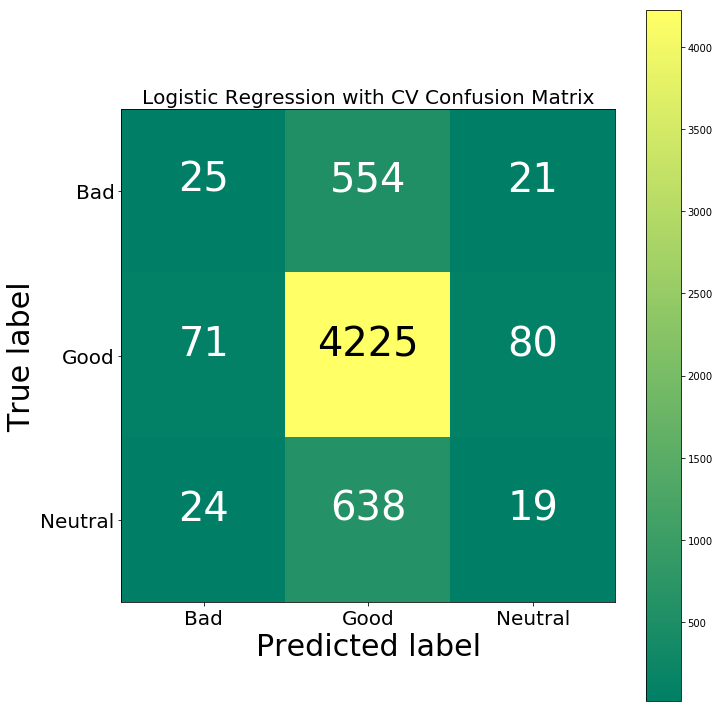

[[  25  554   21]
 [  71 4225   80]
 [  24  638   19]]


In [15]:
cm = confusion_matrix(y_test, y_pred_lr_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Logistic Regression with CV Confusion Matrix')
plt.show()
print(cm)

# Logistic Regression Train Set Accuracy Score

In [16]:
print('Accuracy :', metrics.accuracy_score(y_train, logreg_CV.predict(count_vect_train)))

Accuracy : 0.8247009604619645


# Logistic Regression Train Set Classification Report

In [17]:
print(classification_report(y_train, logreg_CV.predict(count_vect_train)))

             precision    recall  f1-score   support

        bad       1.00      0.26      0.41      1770
       good       0.81      1.00      0.90     13059
    neutral       1.00      0.22      0.36      2142

avg / total       0.86      0.82      0.78     16971



** Since train set accuracy, precision and recalls are better than the test set, there is an overfitting in the model.Especially bad and neutral values are slighytly different from test set.**

# Random Forest with CountVectorizing

In [18]:
rf_CV = RandomForestClassifier(n_estimators = 200, random_state=5)
rf_CV.fit(count_vect_train, y_train)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.7622414707442107


In [19]:
print (classification_report(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

        bad       0.21      0.02      0.04       600
       good       0.78      0.98      0.87      4376
    neutral       0.15      0.02      0.03       681

avg / total       0.64      0.76      0.68      5657



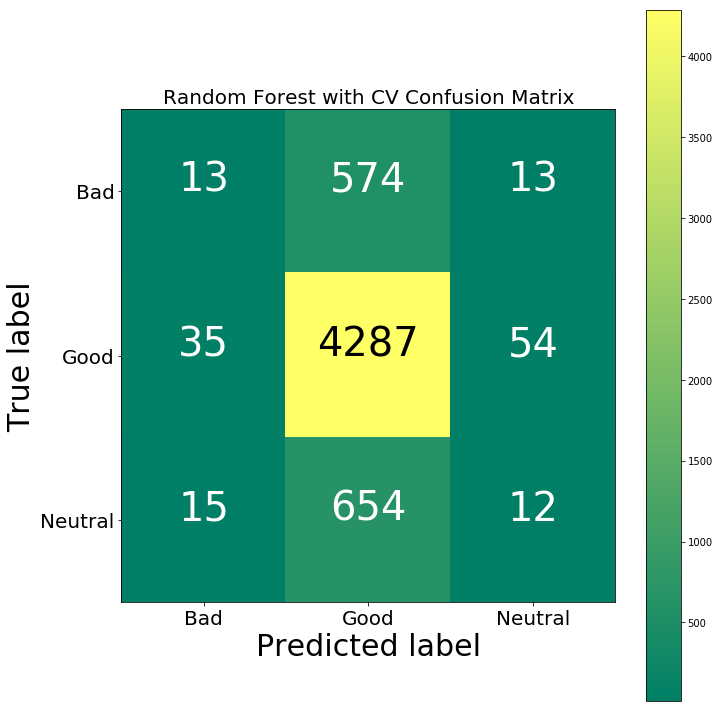

[[  13  574   13]
 [  35 4287   54]
 [  15  654   12]]


In [20]:
cm = confusion_matrix(y_test, y_pred_rf_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Random Forest with CV Confusion Matrix')
plt.show()
print(cm)

# LinearSVM with CountVectorizing

In [21]:
ln_SVM_CV = LinearSVC(random_state=5)
ln_SVM_CV.fit(count_vect_train, y_train)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

Accuracy : 0.7613576100406576


In [22]:
print (classification_report(y_test, y_pred_SVM_CV))

             precision    recall  f1-score   support

        bad       0.21      0.02      0.04       600
       good       0.78      0.98      0.87      4376
    neutral       0.18      0.02      0.04       681

avg / total       0.65      0.76      0.68      5657



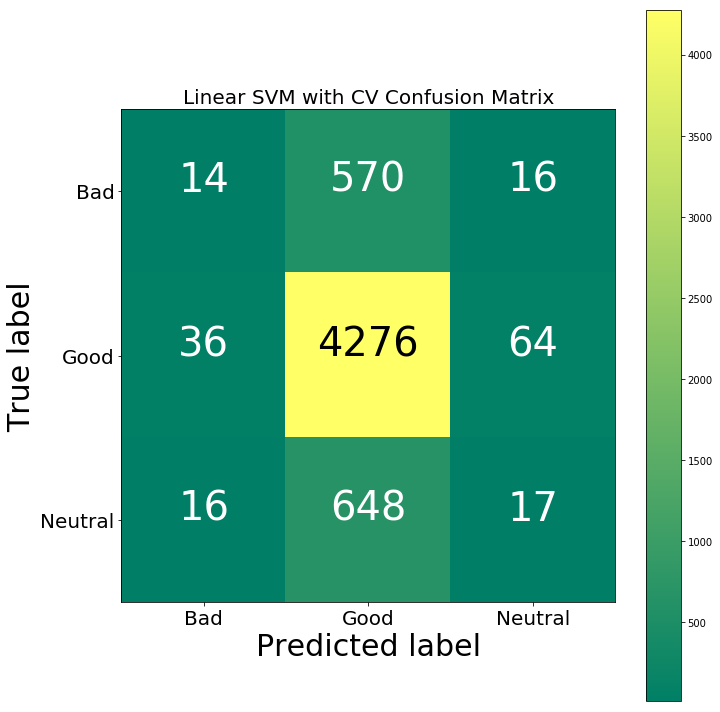

[[  14  570   16]
 [  36 4276   64]
 [  16  648   17]]


In [23]:
cm = confusion_matrix(y_test, y_pred_SVM_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Linear SVM with CV Confusion Matrix')
plt.show()
print(cm)

# Gradient Boosting with CountVectorizing

In [24]:
gb_boost_cv = GradientBoostingClassifier()
gb_boost_cv.fit(count_vect_train, y_train)
y_pred_gb_boost = gb_boost_cv.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_gb_boost))

Accuracy : 0.7735548877496906


In [25]:
print (classification_report(y_test, y_pred_gb_boost))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00       600
       good       0.77      1.00      0.87      4376
    neutral       0.00      0.00      0.00       681

avg / total       0.60      0.77      0.67      5657



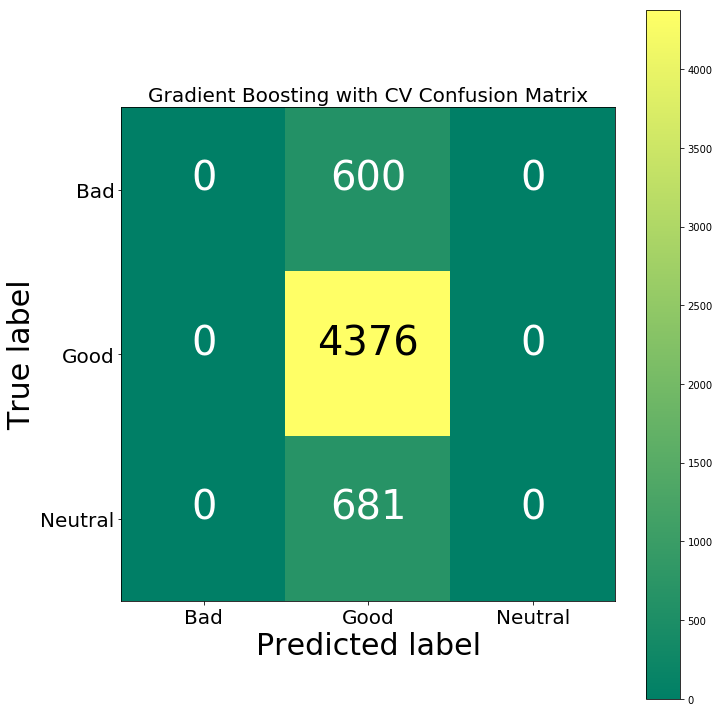

[[   0  600    0]
 [   0 4376    0]
 [   0  681    0]]


In [26]:
cm = confusion_matrix(y_test, y_pred_gb_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Gradient Boosting with CV Confusion Matrix')
plt.show()
print(cm)

# XGBoost with CountVectorizing

In [27]:
xg_boost_CV = XGBClassifier()
xg_boost_CV.fit(count_vect_train, y_train)
y_pred_xg_boost = xg_boost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xg_boost))

Accuracy : 0.7735548877496906


In [28]:
print (classification_report(y_test, y_pred_xg_boost))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00       600
       good       0.77      1.00      0.87      4376
    neutral       0.00      0.00      0.00       681

avg / total       0.60      0.77      0.67      5657



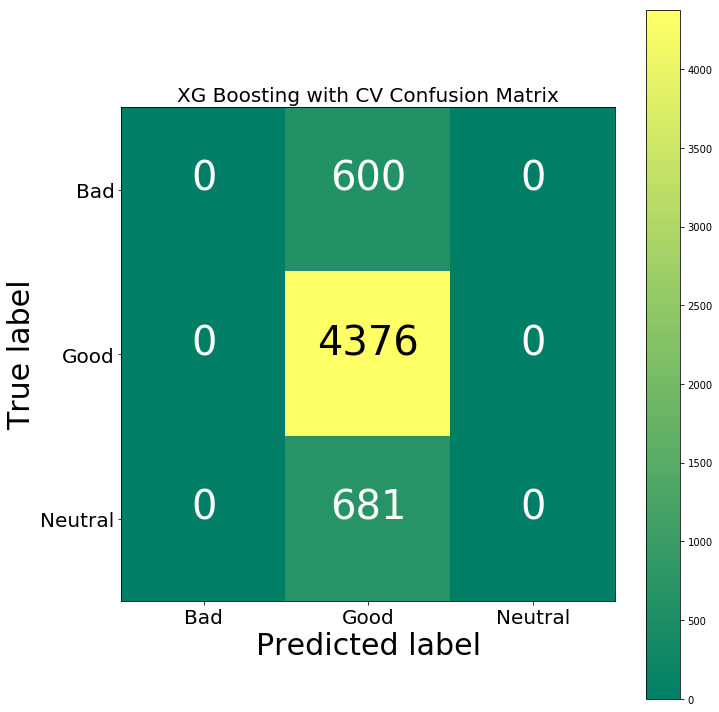

[[   0  600    0]
 [   0 4376    0]
 [   0  681    0]]


In [29]:
cm = confusion_matrix(y_test, y_pred_xg_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='XG Boosting with CV Confusion Matrix')
plt.show()
print(cm)

# Naive Bayes with CountVectorizing

In [30]:
MulNB_cv = MultinomialNB()
MulNB_cv.fit(count_vect_train, y_train)
y_pred_nb_cv = MulNB_cv.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_nb_cv))

Accuracy : 0.7723174827647162


In [31]:
print (classification_report(y_test, y_pred_nb_cv))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00       600
       good       0.77      1.00      0.87      4376
    neutral       0.11      0.00      0.00       681

avg / total       0.61      0.77      0.67      5657



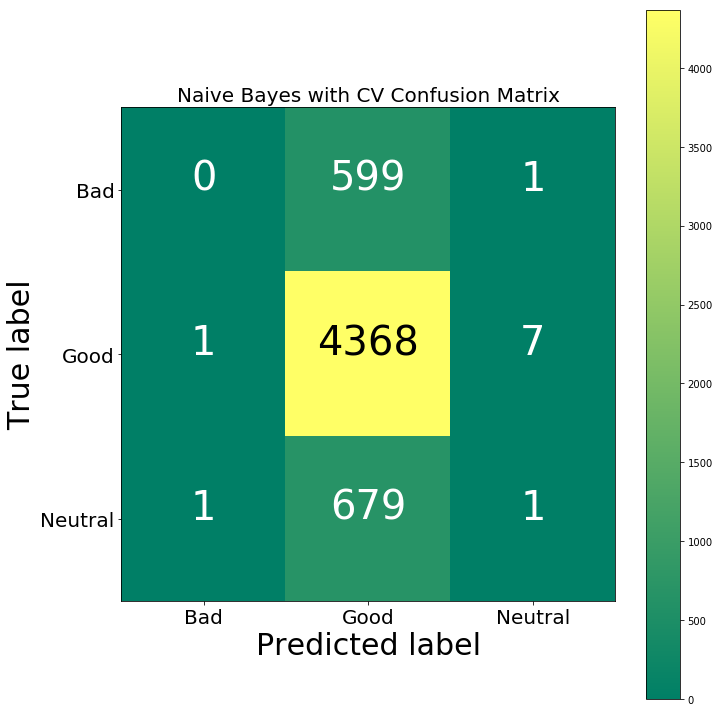

[[   0  599    1]
 [   1 4368    7]
 [   1  679    1]]


In [32]:
cm = confusion_matrix(y_test, y_pred_nb_cv)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Naive Bayes with CV Confusion Matrix')
plt.show()
print(cm)

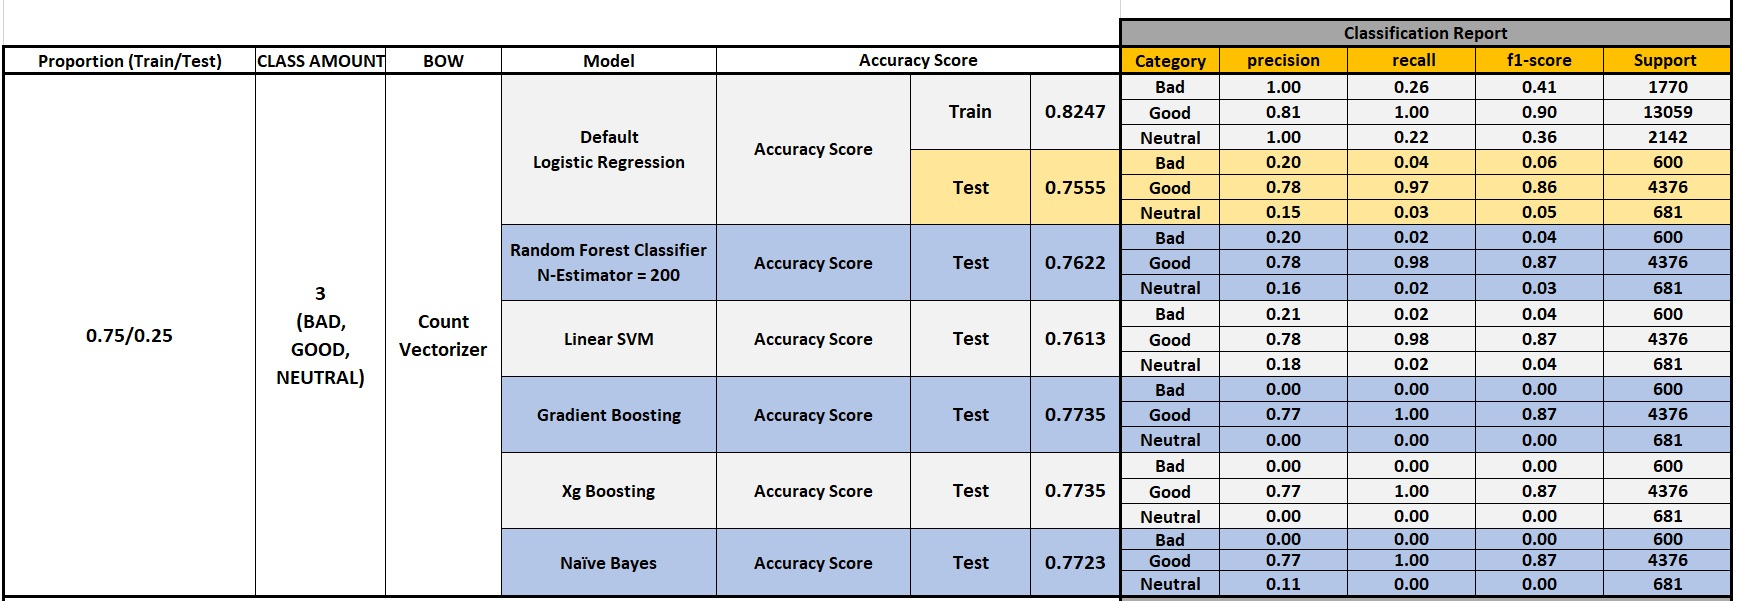

In [33]:
from IPython.display import Image
img = 'Count_Vec_3_class.jpg'
Image(filename=img)

# TF-IDF Vectorizer

In [34]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=0, max_df=1, use_idf=True)
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)

In [35]:
print('Vocabulary len :', len(tfidf_vect.get_feature_names()))
print('Longest word:', max(tfidf_vect.vocabulary_, key=len))

Vocabulary len : 4835
Longest word: twanttopayforshipping


In [36]:
vocab = tfidf_vect.get_feature_names()
pd.DataFrame(np.round(tfidf_vect_train, 2), columns=vocab).head(10)

,aaaaandidon,aaaaannnnnnd,aaahed,aame,abbey,abck,abhor,abnormally,abolutely,abroad,absoluty,abundant,abused,acacia,accenting,accentuatea,acceptably,accepts,accesso,accessorizes,...,yoo,yoself,youth,youthfull,yum,yumi,yummiest,zara,zed,zermatt,zigzagging,zing,zippery,zippie,zoe,zombie,zoolander,zooming,zowie,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression with Tf-Idf Vectorizing

In [37]:
logreg_TV = LogisticRegression(class_weight='balanced', random_state=5)
logreg_TV.fit(tfidf_vect_train, y_train)
y_pred_lr_TV = logreg_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_TV))

Accuracy : 0.7645395085734489


In [38]:
print (classification_report(y_test, y_pred_lr_TV))

             precision    recall  f1-score   support

        bad       0.19      0.02      0.03       600
       good       0.78      0.98      0.87      4376
    neutral       0.14      0.01      0.02       681

avg / total       0.64      0.76      0.68      5657



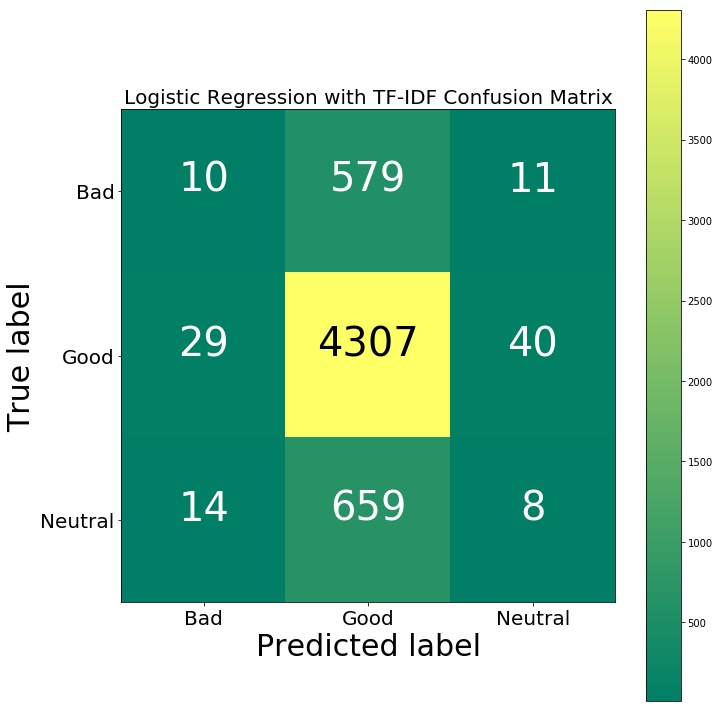

[[  10  579   11]
 [  29 4307   40]
 [  14  659    8]]


In [39]:
cm = confusion_matrix(y_test, y_pred_lr_TV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Logistic Regression with TF-IDF Confusion Matrix')
plt.show()
print(cm)

In [40]:
print('Accuracy :', metrics.accuracy_score(y_train, logreg_TV.predict(tfidf_vect_train)))

Accuracy : 0.8247009604619645


In [41]:
print (classification_report(y_train, logreg_TV.predict(tfidf_vect_train)))

             precision    recall  f1-score   support

        bad       1.00      0.26      0.41      1770
       good       0.81      1.00      0.90     13059
    neutral       1.00      0.22      0.36      2142

avg / total       0.86      0.82      0.78     16971



# Random Forest with Tf-Idf Vectorizing

In [42]:
rf_TV = RandomForestClassifier(n_estimators =200, random_state=5)
rf_TV.fit(tfidf_vect_train, y_train)
y_pred_rf_TV = rf_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_TV))

Accuracy : 0.7618879264627895


In [43]:
print (classification_report(y_test, y_pred_rf_TV))

             precision    recall  f1-score   support

        bad       0.20      0.02      0.04       600
       good       0.78      0.98      0.87      4376
    neutral       0.15      0.02      0.03       681

avg / total       0.64      0.76      0.68      5657



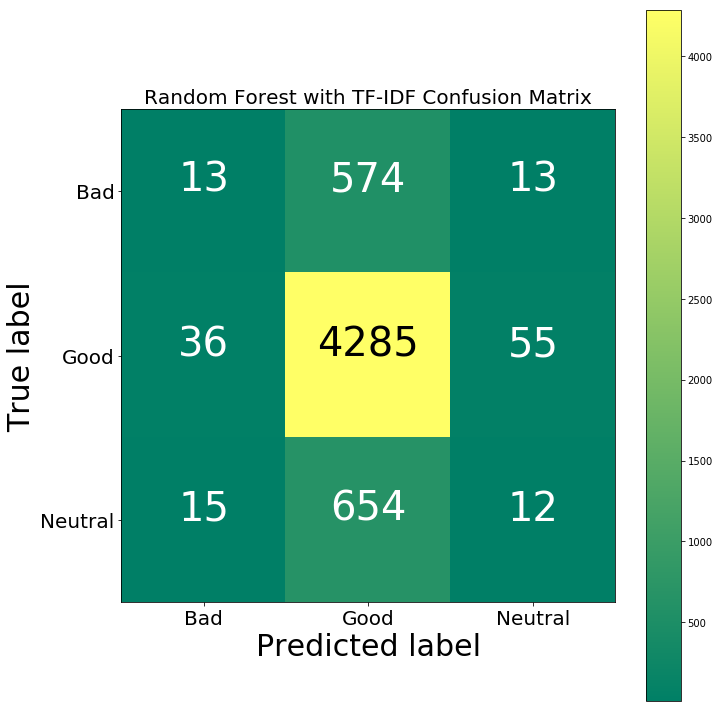

[[  13  574   13]
 [  36 4285   55]
 [  15  654   12]]


In [44]:
cm = confusion_matrix(y_test, y_pred_rf_TV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Random Forest with TF-IDF Confusion Matrix')
plt.show()
print(cm)

# LinearSVM with Tf-Idf Vectorizing

In [45]:
ln_SVM_TV = LinearSVC(random_state=0)
ln_SVM_TV.fit(tfidf_vect_train, y_train)
y_pred_SVM_TV = ln_SVM_CV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_TV))

Accuracy : 0.7624182428849213


In [46]:
print (classification_report(y_test, y_pred_SVM_TV))

             precision    recall  f1-score   support

        bad       0.19      0.02      0.03       600
       good       0.78      0.98      0.87      4376
    neutral       0.17      0.02      0.04       681

avg / total       0.64      0.76      0.68      5657



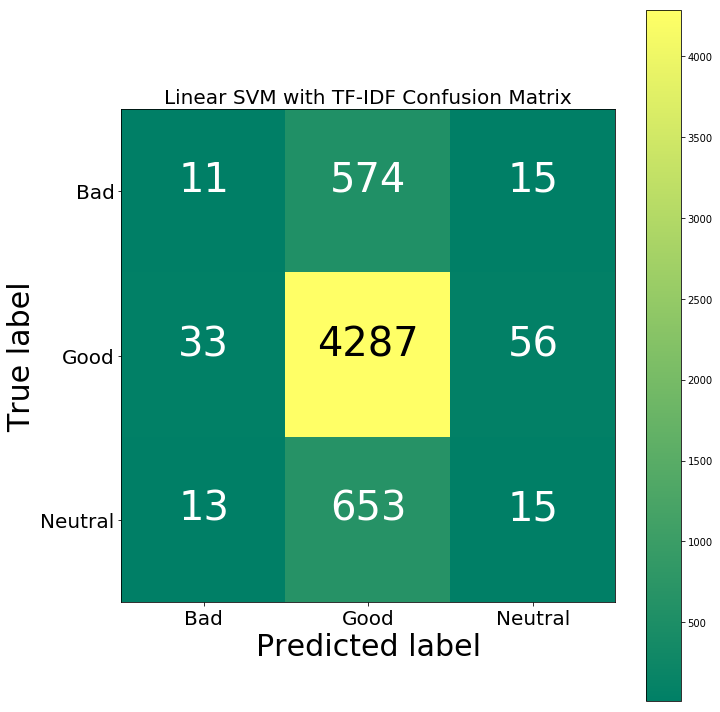

[[  11  574   15]
 [  33 4287   56]
 [  13  653   15]]


In [47]:
cm = confusion_matrix(y_test, y_pred_SVM_TV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Linear SVM with TF-IDF Confusion Matrix')
plt.show()
print(cm)

# Gradient Boosting with TF-IDF

In [48]:
gb_boost_tf = GradientBoostingClassifier()
gb_boost_tf.fit(tfidf_vect_train, y_train)
y_pred_gb_boost = gb_boost_tf.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_gb_boost))

Accuracy : 0.7735548877496906


In [49]:
print (classification_report(y_test, y_pred_gb_boost))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00       600
       good       0.77      1.00      0.87      4376
    neutral       0.00      0.00      0.00       681

avg / total       0.60      0.77      0.67      5657



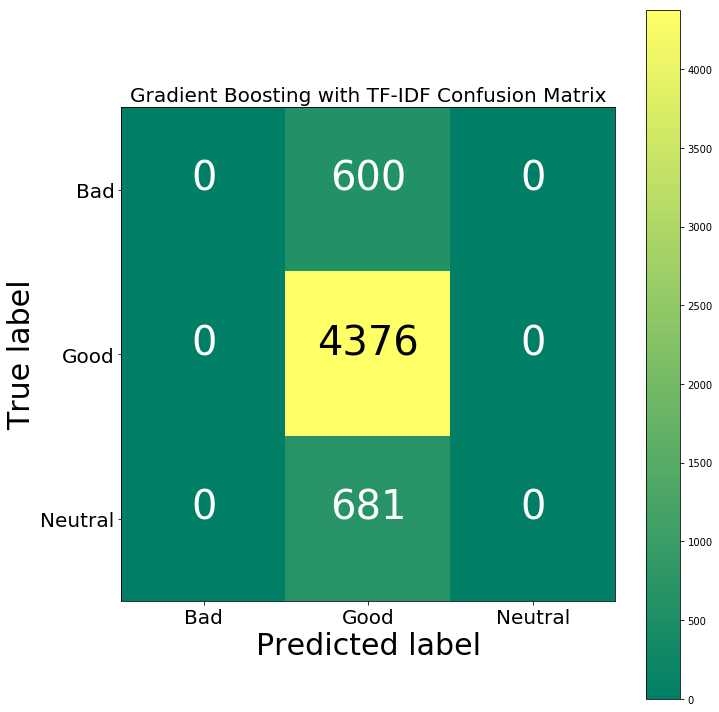

[[   0  600    0]
 [   0 4376    0]
 [   0  681    0]]


In [50]:
cm = confusion_matrix(y_test, y_pred_gb_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Gradient Boosting with TF-IDF Confusion Matrix')
plt.show()
print(cm)

# XG Boost with TF-IDF

In [51]:
xg_boost_tf = XGBClassifier()
xg_boost_tf.fit(tfidf_vect_train, y_train)
y_pred_xg_boost = xg_boost_tf.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xg_boost))

Accuracy : 0.7735548877496906


In [52]:
print (classification_report(y_test, y_pred_xg_boost))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00       600
       good       0.77      1.00      0.87      4376
    neutral       0.00      0.00      0.00       681

avg / total       0.60      0.77      0.67      5657



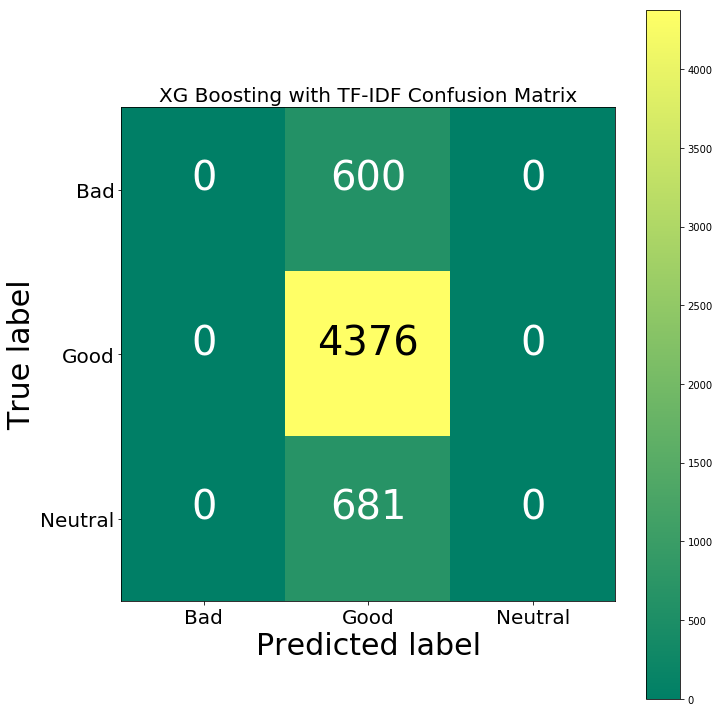

[[   0  600    0]
 [   0 4376    0]
 [   0  681    0]]


In [53]:
cm = confusion_matrix(y_test, y_pred_xg_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='XG Boosting with TF-IDF Confusion Matrix')
plt.show()
print(cm)

# Naive Bayes with TF-IDF

In [54]:
MulNB_tf = MultinomialNB()
MulNB_tf.fit(tfidf_vect_train, y_train)

y_pred_nb_tf = MulNB_tf.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test,y_pred_nb_tf))

Accuracy : 0.7735548877496906


In [55]:
print (classification_report(y_test, y_pred_nb_tf))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00       600
       good       0.77      1.00      0.87      4376
    neutral       0.00      0.00      0.00       681

avg / total       0.60      0.77      0.67      5657



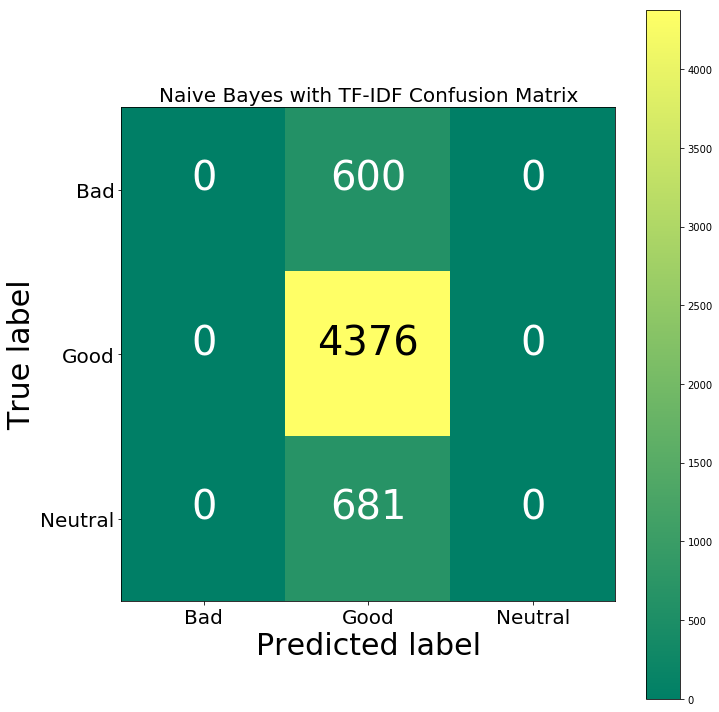

[[   0  600    0]
 [   0 4376    0]
 [   0  681    0]]


In [56]:
cm = confusion_matrix(y_test, y_pred_nb_tf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Naive Bayes with TF-IDF Confusion Matrix')
plt.show()
print(cm)

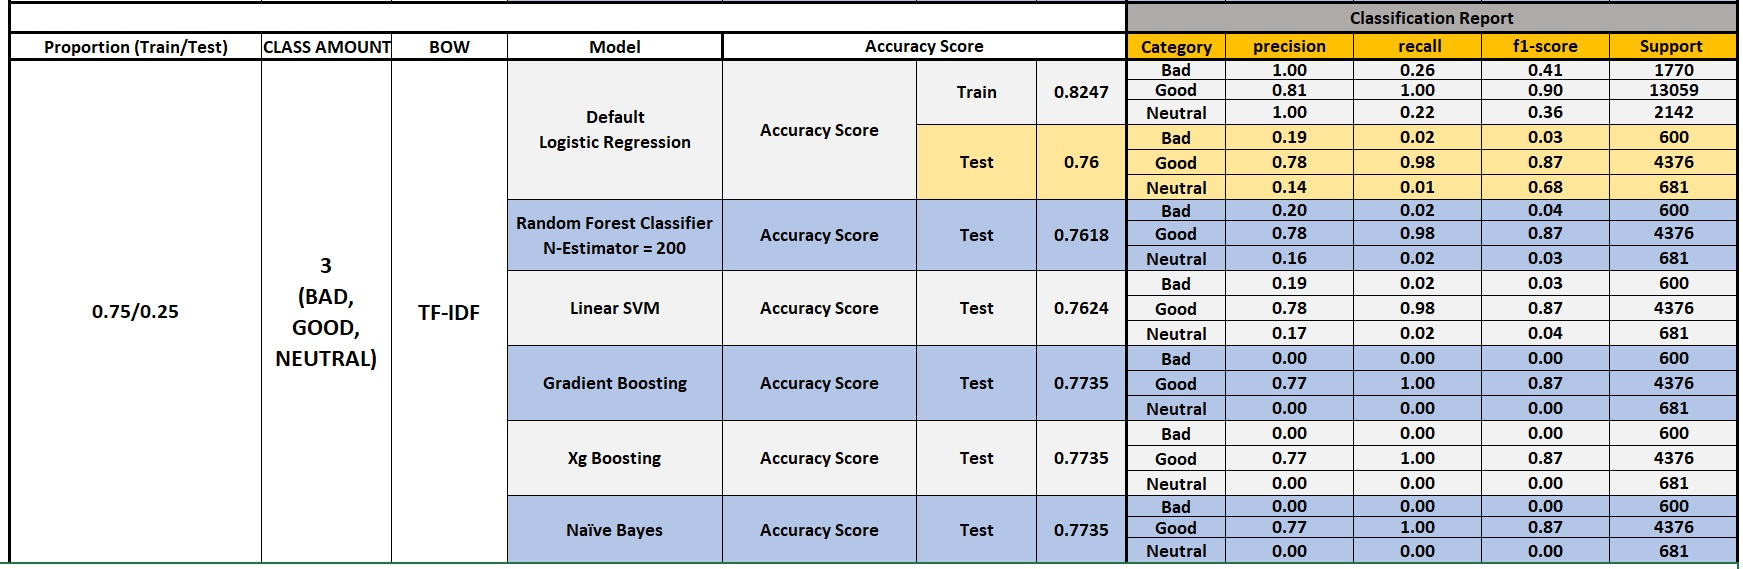

In [57]:
img = 'TF_IDF_3_class.jpg'
Image(filename=img)

### Both Bag of Words methods with the same models gave almost the same accuracy scores. 

# Since there were not too many distinguisher words in different classes, the most and least common 70 words added to the stopwords list and Logistic Regression Model was applied again.

# Words and Frequencies

In [58]:
cleaned_text = [str(txt) for text in df['clean_text'] for txt in text.split(' ') if len(txt)>2 and txt not in 'not, nan']
word_dist = nltk.FreqDist(cleaned_text)

# Adding the Most Common and the Least Common 70 Words to the Stopwords List

In [68]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mustafakadioglu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mustafakadioglu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
stopword_list= stopwords.words('english')
for y in word_dist.most_common()[-70:]:
    stopword_list.append(y[0])
mst_c = word_dist.most_common()[:70]
for x in mst_c:
    stopword_list.append(x[0])

In [70]:
print(len(stopword_list))

319


In [71]:
lemmatizer = WordNetLemmatizer()

In [72]:
# Applying the new stopwords List to the Clean Text Column

In [73]:
df['clean_text'] = df['clean_text'].map(lambda text: " ".join([lemmatizer.lemmatize(w) for w in text.split(' ') if w not in stopword_list]))

In [74]:
text = df['clean_text']
target = df['rating_class']
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.25, random_state=5)

In [75]:
count_vect = CountVectorizer(ngram_range=(1,1), min_df=0.001, max_df=0.999)
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [76]:
print('Vocabulary len :', len(count_vect.get_feature_names()))
print('Longest word   :', max(count_vect.vocabulary_, key=len))

Vocabulary len : 1919
Longest word   : disappointment


# Logistic Regression with Count Vectorizing

In [77]:
logreg_CV = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=0.1, n_jobs=-1, random_state=5)
logreg_CV.fit(count_vect_train, y_train)
y_pred_lr_CV = logreg_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

Accuracy : 0.7689588120912144


 ### Classification Report

In [78]:
print (classification_report(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

        bad       0.44      0.57      0.50       600
       good       0.95      0.84      0.89      4376
    neutral       0.32      0.46      0.38       681

avg / total       0.82      0.77      0.79      5657



### Confusion Matrix

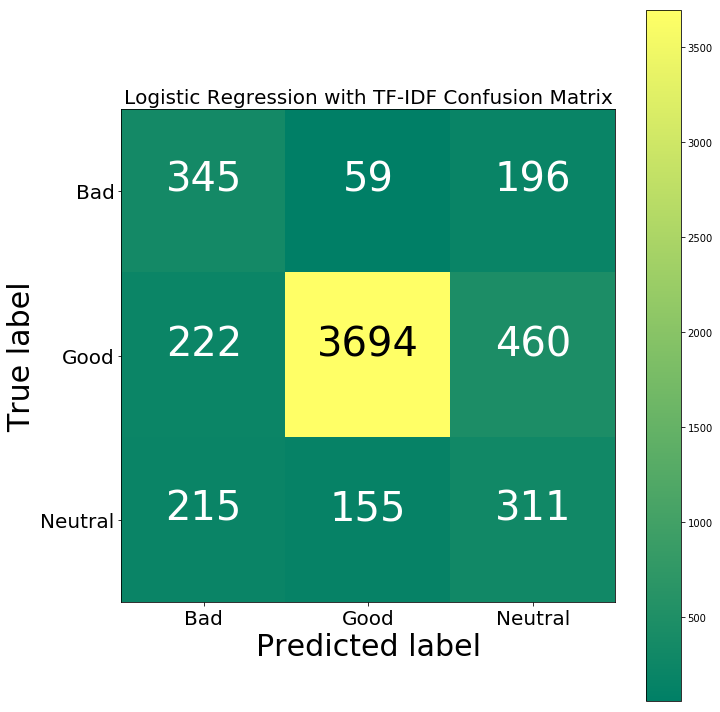

[[ 345   59  196]
 [ 222 3694  460]
 [ 215  155  311]]


In [79]:
cm = confusion_matrix(y_test, y_pred_lr_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Logistic Regression with TF-IDF Confusion Matrix')
plt.show()
print(cm)

# Logistic Regression Train Set Accurayc Report

In [80]:
print('Accuracy :', metrics.accuracy_score(y_train, logreg_CV.predict(count_vect_train)))

Accuracy : 0.8429674150020623


# Logistic Regression Train Set Accurayc Report

In [81]:
print(classification_report(y_train, logreg_CV.predict(count_vect_train)))

             precision    recall  f1-score   support

        bad       0.63      0.81      0.71      1770
       good       0.97      0.86      0.92     13059
    neutral       0.51      0.74      0.61      2142

avg / total       0.88      0.84      0.86     16971



# Linear SVM 

In [82]:
ln_SVM_CV = LinearSVC(random_state=5)
ln_SVM_CV.fit(count_vect_train, y_train)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

Accuracy : 0.8041364680926286


In [83]:
print (classification_report(y_test, y_pred_SVM_CV))

             precision    recall  f1-score   support

        bad       0.51      0.45      0.48       600
       good       0.88      0.94      0.91      4376
    neutral       0.36      0.24      0.28       681

avg / total       0.78      0.80      0.79      5657



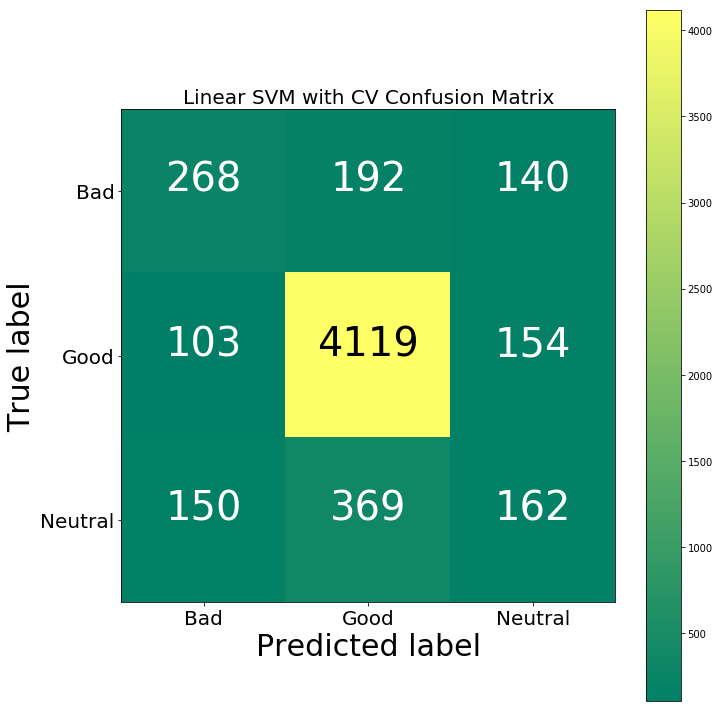

[[ 268  192  140]
 [ 103 4119  154]
 [ 150  369  162]]


In [84]:
cm = confusion_matrix(y_test, y_pred_SVM_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Linear SVM with CV Confusion Matrix')
plt.show()
print(cm)

# Random Forest

In [85]:
rf_CV = RandomForestClassifier(random_state=5)
rf_CV.fit(count_vect_train, y_train)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.7898179246950681


In [86]:
print (classification_report(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

        bad       0.49      0.36      0.42       600
       good       0.84      0.96      0.89      4376
    neutral       0.31      0.10      0.15       681

avg / total       0.74      0.79      0.75      5657



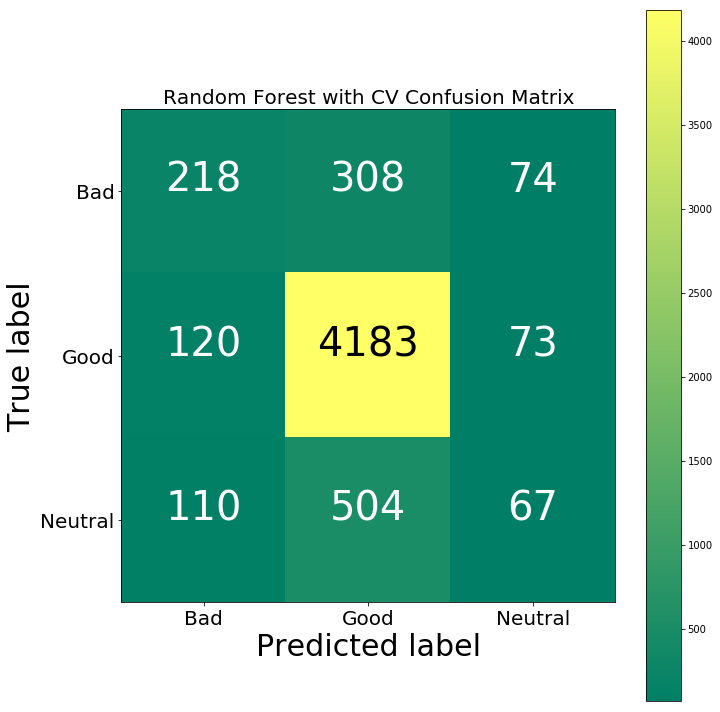

[[ 218  308   74]
 [ 120 4183   73]
 [ 110  504   67]]


In [87]:
cm = confusion_matrix(y_test, y_pred_rf_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Random Forest with CV Confusion Matrix')
plt.show()
print(cm)

# Gradient Boosting Regressor

In [88]:
gb_boost_cv = GradientBoostingClassifier()
gb_boost_cv.fit(count_vect_train, y_train)
y_pred_gb_boost = gb_boost_cv.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_gb_boost))

Accuracy : 0.7972423546049142


In [89]:
print (classification_report(y_test, y_pred_gb_boost))

             precision    recall  f1-score   support

        bad       0.62      0.21      0.32       600
       good       0.81      0.99      0.89      4376
    neutral       0.43      0.09      0.15       681

avg / total       0.75      0.80      0.74      5657



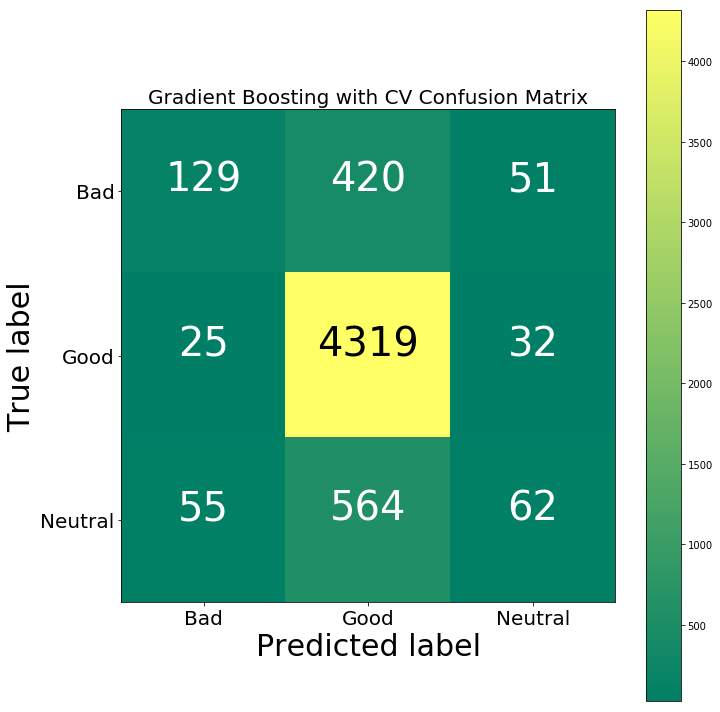

[[ 129  420   51]
 [  25 4319   32]
 [  55  564   62]]


In [90]:
cm = confusion_matrix(y_test, y_pred_gb_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Gradient Boosting with CV Confusion Matrix')
plt.show()
print(cm)

# Xg Boosting Regressor

In [91]:
xg_boost_CV = XGBClassifier()
xg_boost_CV.fit(count_vect_train, y_train)
y_pred_xg_boost = xg_boost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xg_boost))

Accuracy : 0.7931765953685699


In [94]:
print (classification_report(y_test, y_pred_xg_boost))

             precision    recall  f1-score   support

        bad       0.62      0.18      0.28       600
       good       0.81      0.99      0.89      4376
    neutral       0.42      0.06      0.10       681

avg / total       0.74      0.79      0.73      5657



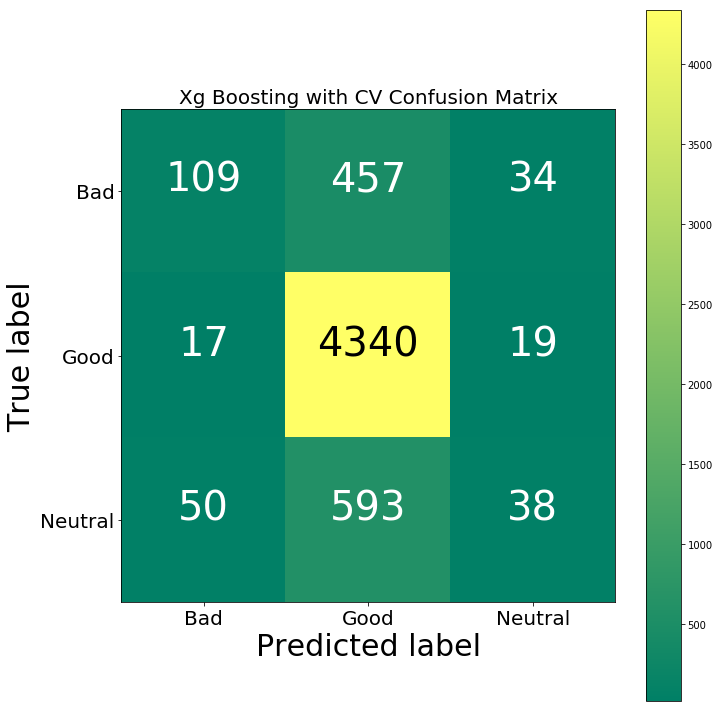

[[ 109  457   34]
 [  17 4340   19]
 [  50  593   38]]


In [95]:
cm = confusion_matrix(y_test, y_pred_xg_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Xg Boosting with CV Confusion Matrix')
plt.show()
print(cm)

# Naive Bayes with CV

In [96]:
MulNB_CV = MultinomialNB()
MulNB_CV.fit(count_vect_train, y_train)

y_pred_nb_CV = MulNB_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test,y_pred_nb_CV ))

Accuracy : 0.8037829238112073


In [97]:
print (classification_report(y_test, y_pred_nb_CV))

             precision    recall  f1-score   support

        bad       0.55      0.52      0.53       600
       good       0.92      0.90      0.91      4376
    neutral       0.36      0.44      0.40       681

avg / total       0.82      0.80      0.81      5657



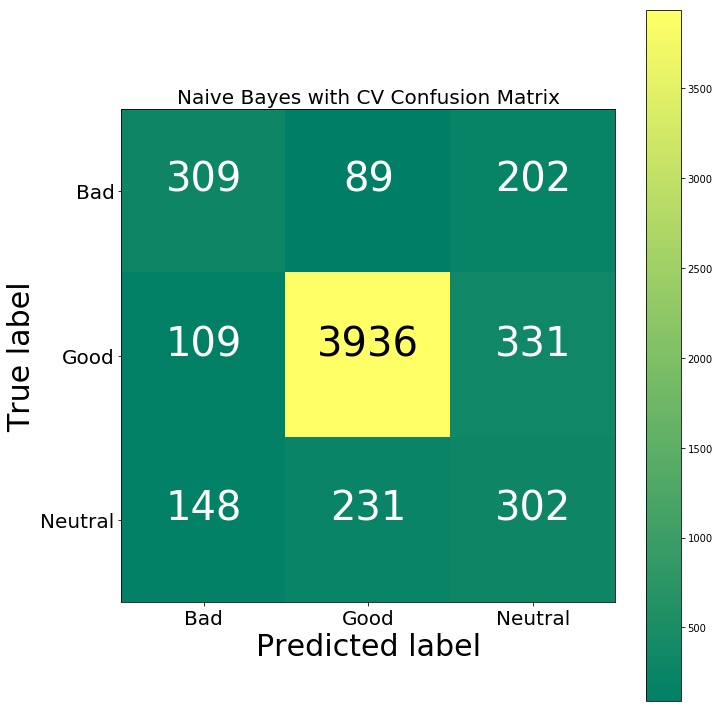

[[ 309   89  202]
 [ 109 3936  331]
 [ 148  231  302]]


In [98]:
cm = confusion_matrix(y_test, y_pred_nb_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Naive Bayes with CV Confusion Matrix')
plt.show()
print(cm)

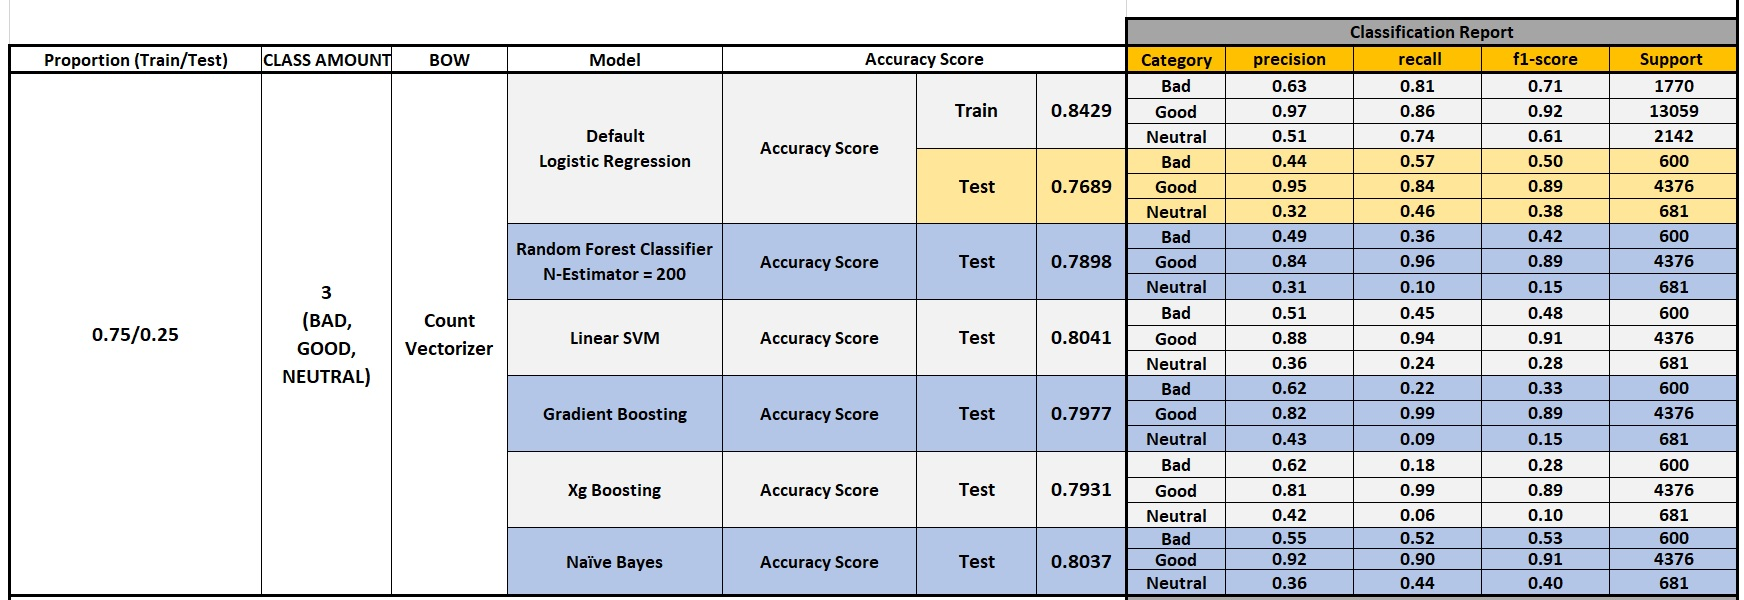

In [99]:
img = 'Stopwords.jpg'
Image(filename=img)

# Synthetic Minority Oversampling Technique (SMOTE)

In [100]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=5)
df_text, df_target = sm.fit_sample(count_vect_train, y_train)
#print (count_vect_train.value_counts(), np.bincount(df_target))
print (df_text.shape)
print (df_target.shape)

(39177, 1919)
(39177,)


In [101]:
from collections import Counter
Counter(df_target)

Counter({'good': 13059, 'neutral': 13059, 'bad': 13059})

# Logistic Regression

In [102]:
logreg_CV = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=0.1, n_jobs=-1, random_state=5)
logreg_CV.fit(df_text, df_target)
y_pred_lr_CV = logreg_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

Accuracy : 0.7350185610747746


In [103]:
print (classification_report(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

        bad       0.42      0.53      0.47       600
       good       0.94      0.81      0.87      4376
    neutral       0.27      0.45      0.34       681

avg / total       0.80      0.74      0.76      5657



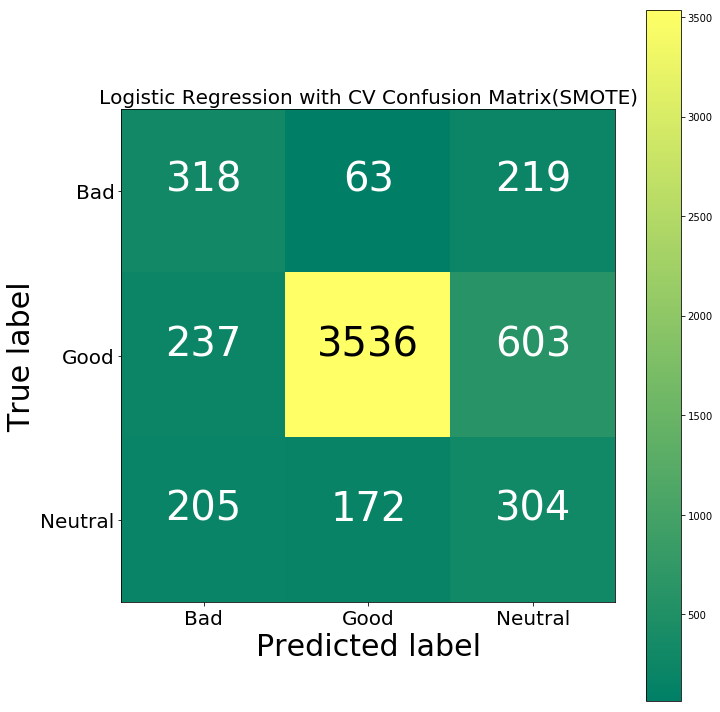

[[ 318   63  219]
 [ 237 3536  603]
 [ 205  172  304]]


In [104]:
cm = confusion_matrix(y_test, y_pred_lr_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Logistic Regression with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Train Set Accuracy Report

In [105]:
print('Accuracy :', metrics.accuracy_score(df_target, logreg_CV.predict(df_text)))

Accuracy : 0.853383362687291


# Train Set Classification Report

In [106]:
print (classification_report(df_target, logreg_CV.predict(df_text)))

             precision    recall  f1-score   support

        bad       0.86      0.87      0.87     13059
       good       0.91      0.85      0.88     13059
    neutral       0.79      0.84      0.82     13059

avg / total       0.86      0.85      0.85     39177



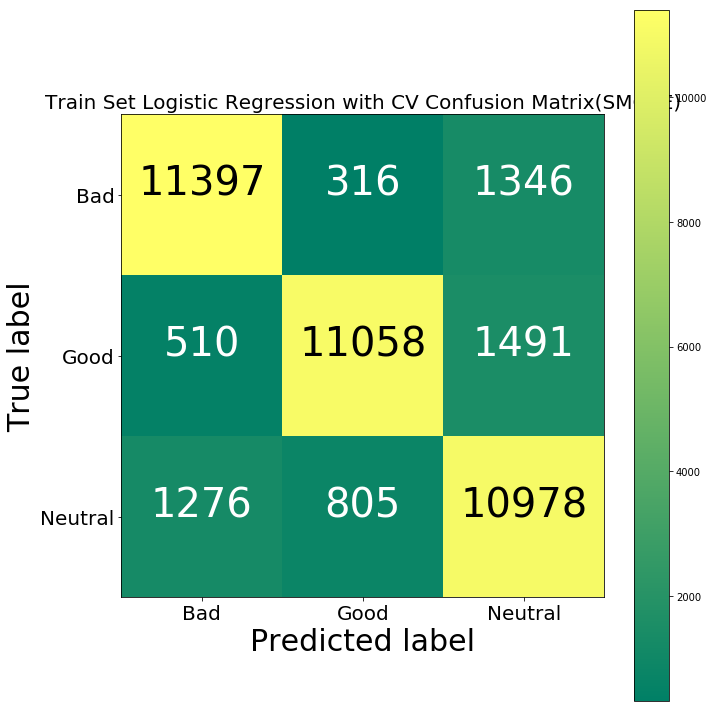

[[11397   316  1346]
 [  510 11058  1491]
 [ 1276   805 10978]]


In [107]:
cm = confusion_matrix(df_target, logreg_CV.predict(df_text))
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Train Set Logistic Regression with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# K NNeighbors Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
neigh_CV = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
neigh_CV.fit(df_text, df_target)
y_pred_kn_CV = neigh_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_kn_CV))

Accuracy : 0.45819338872193743


In [110]:
print (classification_report(y_test, y_pred_kn_CV))

             precision    recall  f1-score   support

        bad       0.20      0.40      0.26       600
       good       0.89      0.46      0.61      4376
    neutral       0.15      0.47      0.23       681

avg / total       0.73      0.46      0.53      5657



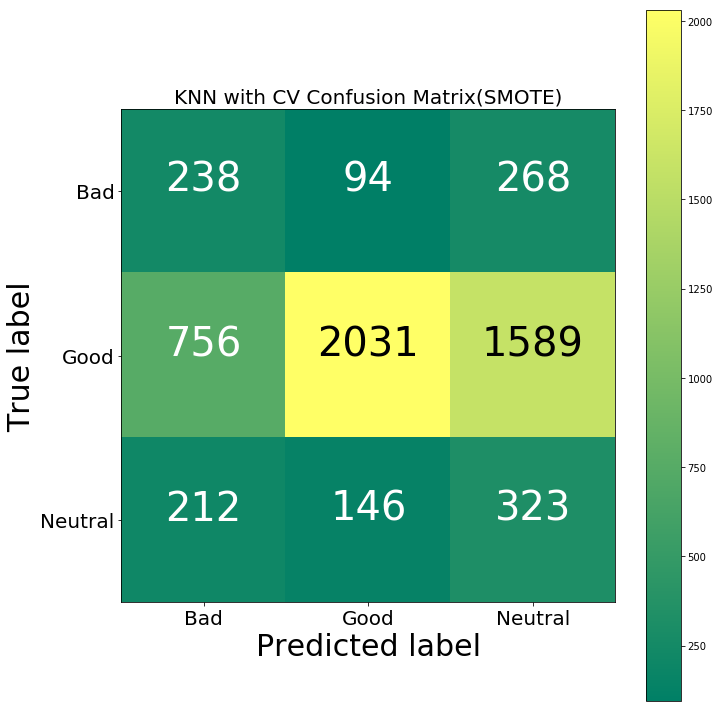

[[ 238   94  268]
 [ 756 2031 1589]
 [ 212  146  323]]


In [111]:
cm = confusion_matrix(y_test, y_pred_kn_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='KNN with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Random Forest

In [112]:
rf_CV = RandomForestClassifier(n_estimators = 200, random_state=5)
rf_CV.fit(df_text, df_target)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.798302987449178


In [113]:
print (classification_report(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

        bad       0.60      0.28      0.39       600
       good       0.82      0.98      0.90      4376
    neutral       0.33      0.08      0.13       681

avg / total       0.74      0.80      0.75      5657



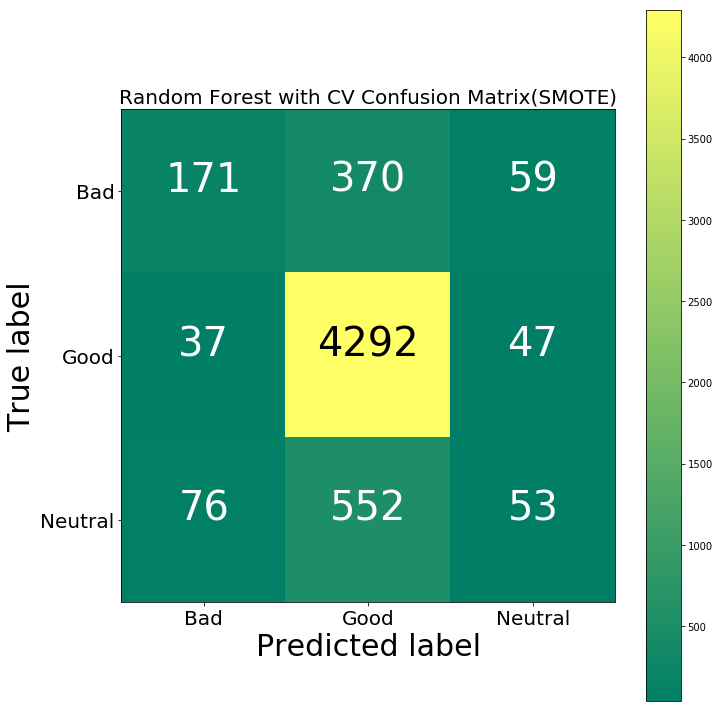

[[ 171  370   59]
 [  37 4292   47]
 [  76  552   53]]


In [114]:
cm = confusion_matrix(y_test, y_pred_rf_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Random Forest with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Linear SVM

In [115]:
ln_SVM_CV = LinearSVC(random_state=5)
ln_SVM_CV.fit(df_text, df_target)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

Accuracy : 0.7260031818985327


In [116]:
print (classification_report(y_test, y_pred_SVM_CV))

             precision    recall  f1-score   support

        bad       0.38      0.48      0.43       600
       good       0.92      0.81      0.86      4376
    neutral       0.26      0.39      0.31       681

avg / total       0.78      0.73      0.75      5657



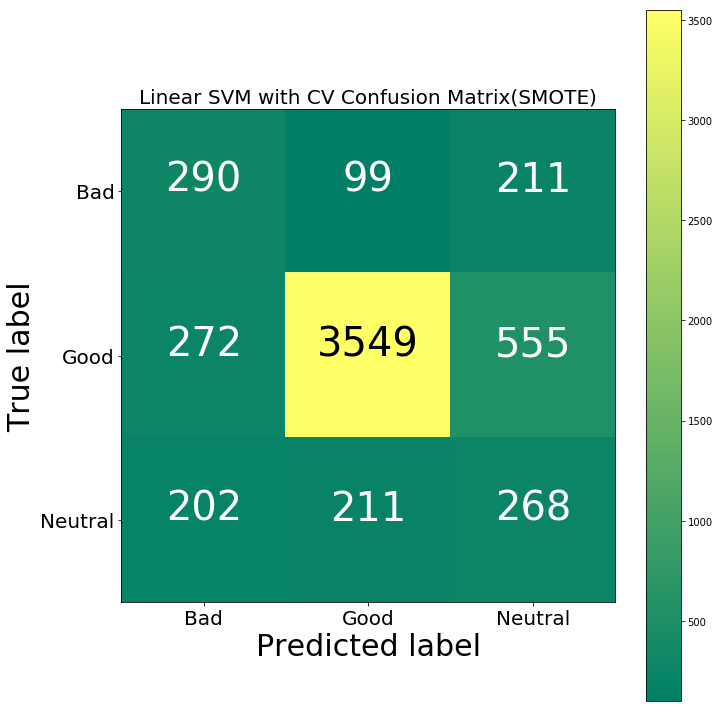

[[ 290   99  211]
 [ 272 3549  555]
 [ 202  211  268]]


In [117]:
cm = confusion_matrix(y_test, y_pred_SVM_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Linear SVM with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Gradient Boosting Regressor

In [118]:
gb_boost_cv = GradientBoostingClassifier()
gb_boost_cv.fit(df_text, df_target)
y_pred_gb_boost = gb_boost_cv.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_gb_boost))

Accuracy : 0.7532260915679689


In [119]:
print (classification_report(y_test, y_pred_gb_boost))

             precision    recall  f1-score   support

        bad       0.51      0.34      0.41       600
       good       0.87      0.88      0.87      4376
    neutral       0.25      0.31      0.28       681

avg / total       0.76      0.75      0.75      5657



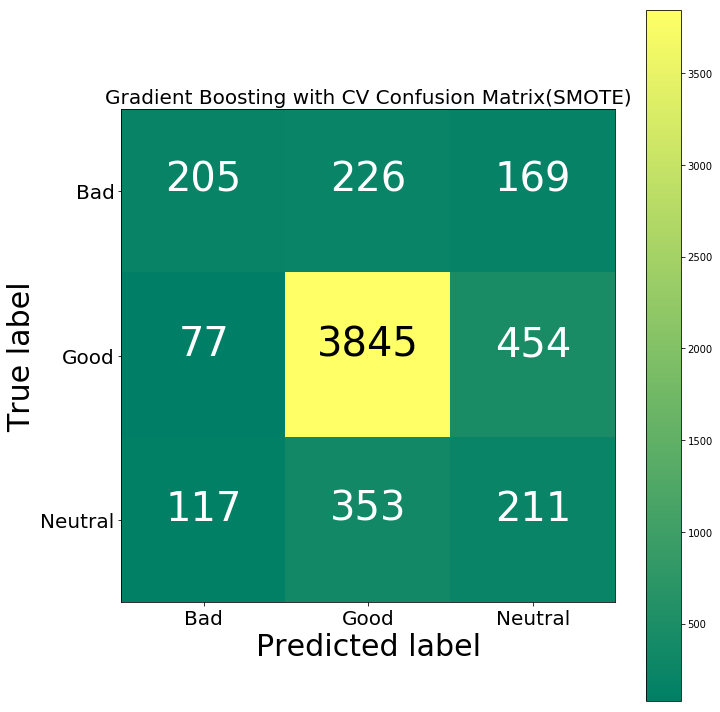

[[ 205  226  169]
 [  77 3845  454]
 [ 117  353  211]]


In [120]:
cm = confusion_matrix(y_test, y_pred_gb_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Gradient Boosting with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Xg Boosting

In [121]:
xg_boost_CV = XGBClassifier()
xg_boost_CV.fit(df_text, df_target)
y_pred_xg_boost = xg_boost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xg_boost))

Accuracy : 0.7429733074067527


In [122]:
print (classification_report(y_test, y_pred_xg_boost))

             precision    recall  f1-score   support

        bad       0.49      0.32      0.38       600
       good       0.87      0.87      0.87      4376
    neutral       0.24      0.32      0.28       681

avg / total       0.75      0.74      0.75      5657



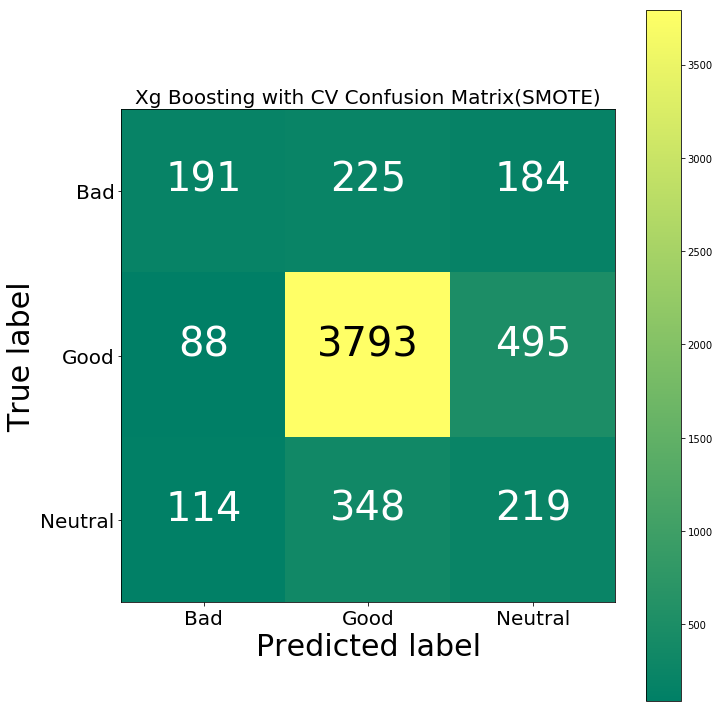

[[ 191  225  184]
 [  88 3793  495]
 [ 114  348  219]]


In [123]:
cm = confusion_matrix(y_test, y_pred_xg_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Xg Boosting with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Naive Bayes

In [124]:
MulNB_CV = MultinomialNB()
MulNB_CV.fit(df_text, df_target)

y_pred_nb_CV = MulNB_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test,y_pred_nb_CV))

Accuracy : 0.7546402686936539


In [125]:
print (classification_report(y_test, y_pred_nb_CV))

             precision    recall  f1-score   support

        bad       0.46      0.55      0.50       600
       good       0.95      0.82      0.88      4376
    neutral       0.31      0.53      0.39       681

avg / total       0.82      0.75      0.78      5657



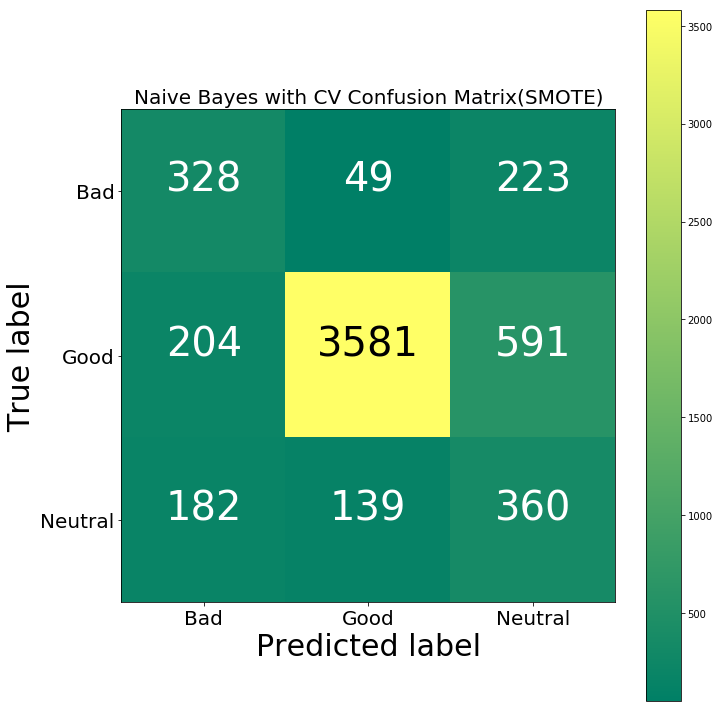

[[ 328   49  223]
 [ 204 3581  591]
 [ 182  139  360]]


In [126]:
cm = confusion_matrix(y_test, y_pred_nb_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Naive Bayes with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

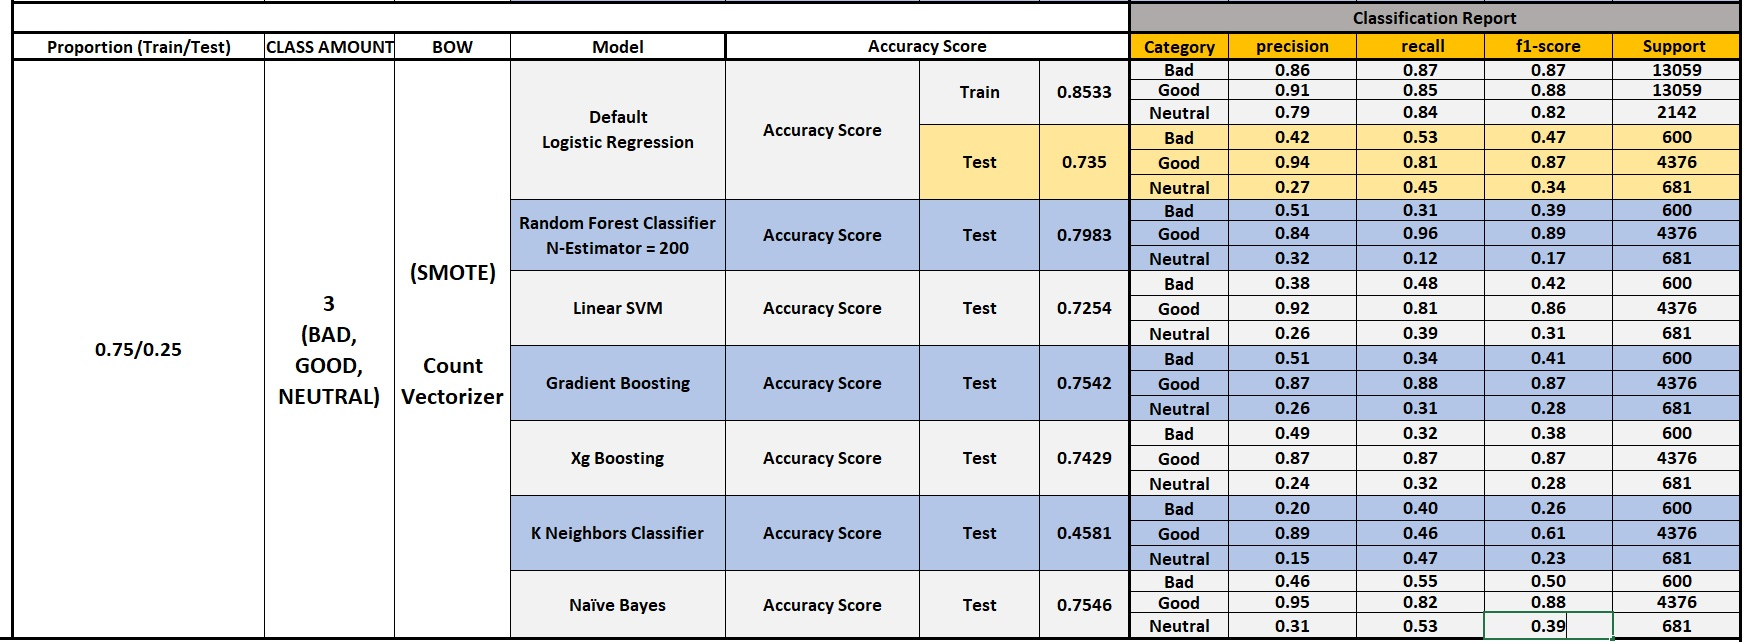

In [127]:
img = 'Stopwords_SMOTE.jpg'
Image(filename=img)

# Applying PCA to Decrease the Linear Dimentionality (Fit-Transform)

In [128]:
from sklearn.decomposition import PCA
count_vect = CountVectorizer(ngram_range=(1,1), min_df=0.001, max_df=0.975)
pca = PCA(random_state=5)
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
pca_X_train = pca.fit_transform(count_vect_train)



count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()
pca_X_test = pca.fit_transform(count_vect_test)

In [129]:
sm = SMOTE(random_state=5)
df_text, df_target = sm.fit_sample(pca_X_train, y_train)
#print (count_vect_train.value_counts(), np.bincount(df_target))
print (df_text.shape)
print (df_target.shape)

(39177, 1919)
(39177,)


In [130]:
from collections import Counter
Counter(df_target)

Counter({'good': 13059, 'neutral': 13059, 'bad': 13059})

In [131]:
logreg_CV = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C = 0.1, n_jobs=-1, random_state=5)
logreg_CV.fit(df_text, df_target)
y_pred_lr_CV = logreg_CV.predict(pca_X_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

Accuracy : 0.5136998409050734


In [132]:
print (classification_report(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

        bad       0.12      0.16      0.14       600
       good       0.77      0.61      0.68      4376
    neutral       0.10      0.20      0.13       681

avg / total       0.62      0.51      0.56      5657



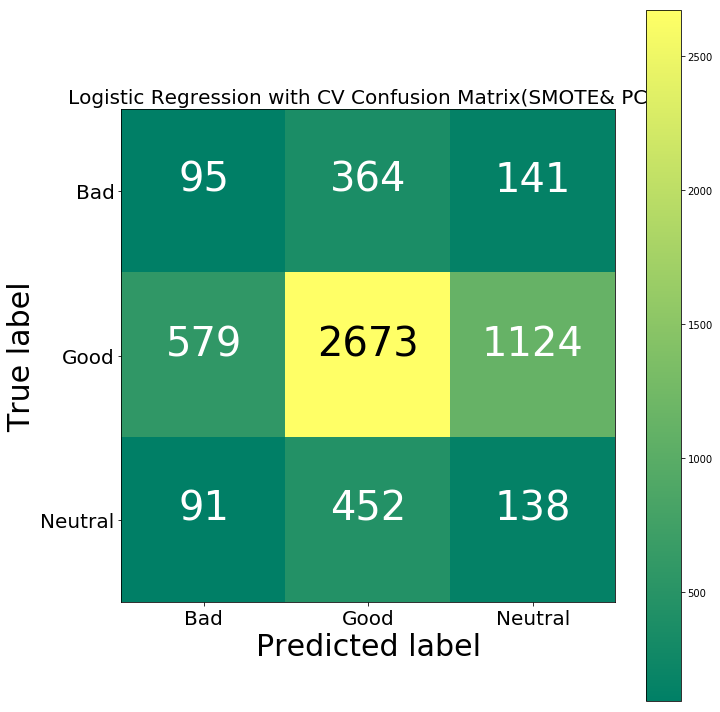

[[  95  364  141]
 [ 579 2673 1124]
 [  91  452  138]]


In [133]:
cm = confusion_matrix(y_test, y_pred_lr_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Logistic Regression with CV Confusion Matrix(SMOTE& PCA)')
plt.show()
print(cm)

# Random Forest

In [134]:
rf_CV = RandomForestClassifier(n_estimators = 200, random_state=5)
rf_CV.fit(df_text, df_target)
y_pred_rf_CV = rf_CV.predict(pca_X_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.6996641329326498


In [135]:
print (classification_report(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

        bad       0.11      0.03      0.05       600
       good       0.77      0.89      0.83      4376
    neutral       0.08      0.05      0.06       681

avg / total       0.61      0.70      0.65      5657



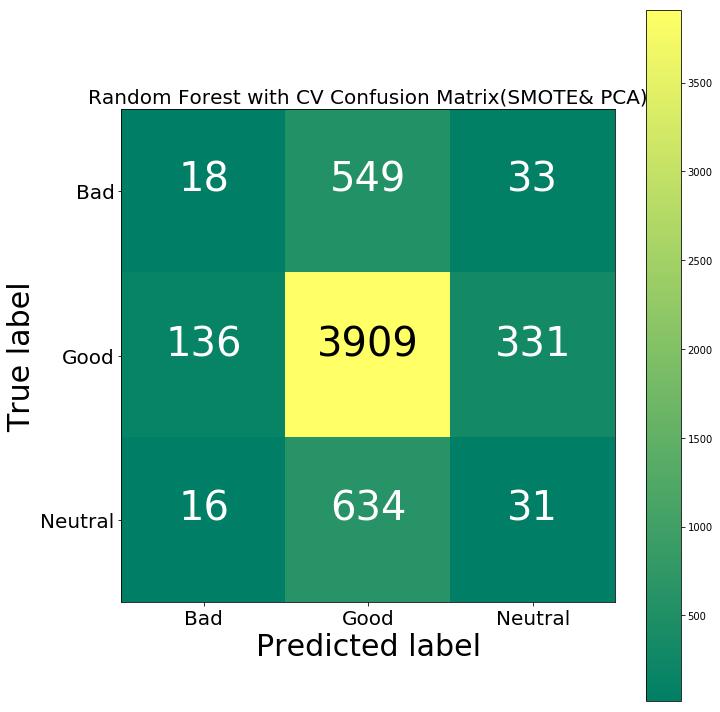

[[  18  549   33]
 [ 136 3909  331]
 [  16  634   31]]


In [136]:
cm = confusion_matrix(y_test, y_pred_rf_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Random Forest with CV Confusion Matrix(SMOTE& PCA)')
plt.show()
print(cm)

# Truncated SVD

In [137]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(random_state=5)
svd_X_train = svd.fit_transform(count_vect_train)
svd_X_test = svd.fit_transform(count_vect_test)

# SMOTE

In [138]:
sm = SMOTE(random_state=5)
df_ttext, df_ttarget = sm.fit_sample(svd_X_train, y_train)
#print (count_vect_train.value_counts(), np.bincount(df_target))
print (df_ttext.shape)
print (df_ttarget.shape)

(39177, 2)
(39177,)


In [139]:
from collections import Counter
Counter(df_ttarget)

Counter({'good': 13059, 'neutral': 13059, 'bad': 13059})

# Logistic Regression

In [140]:
logreg_CV = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              n_jobs=-1, random_state=5)
logreg_CV.fit(df_ttext, df_ttarget)
y_pred_lr_CV = logreg_CV.predict(svd_X_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

Accuracy : 0.5057450945730952


In [141]:
print (classification_report(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

        bad       0.17      0.46      0.25       600
       good       0.91      0.53      0.67      4376
    neutral       0.18      0.39      0.25       681

avg / total       0.74      0.51      0.57      5657



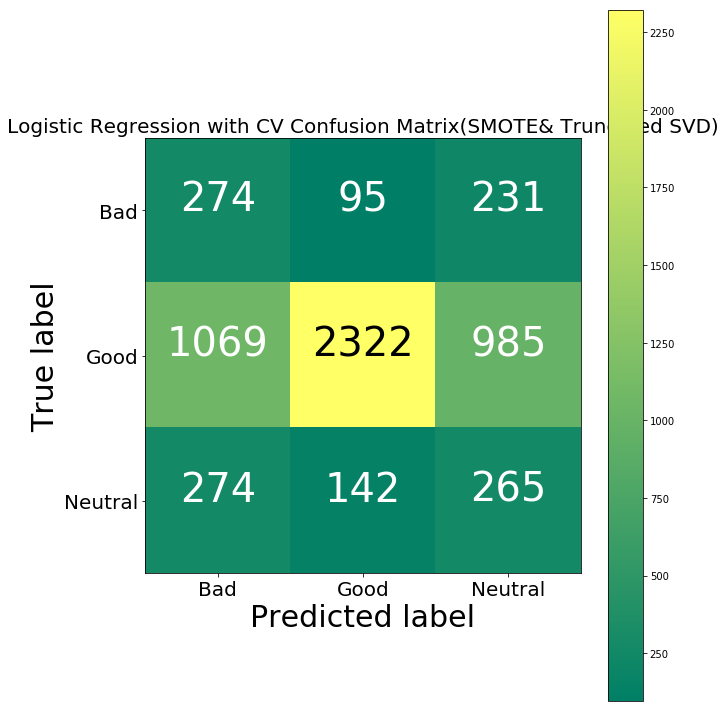

[[ 274   95  231]
 [1069 2322  985]
 [ 274  142  265]]


In [142]:
cm = confusion_matrix(y_test, y_pred_lr_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Logistic Regression with CV Confusion Matrix(SMOTE& Truncated SVD)')
plt.show()
print(cm)

# Random Forest

In [143]:
rf_CV = RandomForestClassifier(n_estimators = 200, random_state=5)
rf_CV.fit(df_ttext, df_ttarget)
y_pred_rf_CV = rf_CV.predict(svd_X_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.5069824995580696


In [144]:
print (classification_report(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

        bad       0.13      0.28      0.18       600
       good       0.83      0.58      0.68      4376
    neutral       0.13      0.27      0.18       681

avg / total       0.67      0.51      0.57      5657



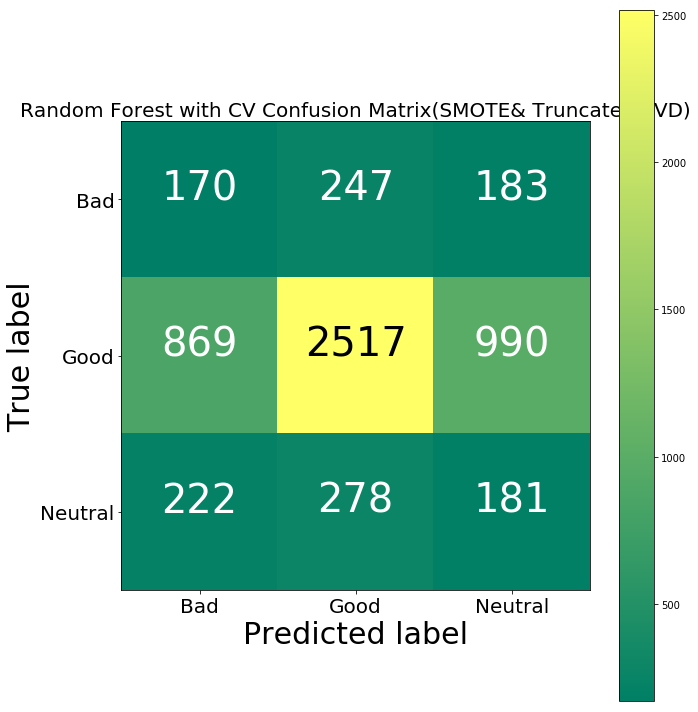

[[ 170  247  183]
 [ 869 2517  990]
 [ 222  278  181]]


In [145]:
cm = confusion_matrix(y_test, y_pred_rf_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, title='Random Forest with CV Confusion Matrix(SMOTE& Truncated SVD)')
plt.show()
print(cm)

### Without adding the most and least common 70 words to the stopwords list, bad and neutral precision and recall are slightly low. Most probable reason is that there are no too much characteristic words to distinguish the classes. After adding the common words to the stopwords list, neutral and bad precision and recall increased almost 3 times. SMOTE did not effect the accuracy of the models too much and Linear Dimentionality Reduction (PCA and TruncatedSVD) decreased the accuracy of the models. 
### It is time to decrease classes to two as Bad and Not Bad(Good + Neutral) and apply the same models.

In [146]:
df.head()

,clothing_id,age,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,new_text,clean_text,review_length,rating_class,tokens
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy,45,good,"['absolutely', 'wonderful', 'silky', 'sexy', '..."
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,sooo happened find glad bc never online b...,195,good,"['love', 'dress', 'sooo', 'pretty', 'happened'..."
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,major design flaw high hope wanted initially ...,338,neutral,"['major', 'design', 'flaw', 'high', 'hope', 'd..."
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",favorite buy jumpsuit fun flirty fabulou...,110,good,"['favorite', 'buy', 'love', 'love', 'love', 'j..."
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,due adjustable front tie legging sleeveless p...,132,good,"['flattering', 'shirt', 'shirt', 'flattering',..."


# Neutral and Good Classes are Merged as Not Bad

In [147]:
df.rating_class = df.rating_class.apply(lambda x: x.replace('neutral', 'good'))

In [148]:
df.rating_class = df.rating_class.apply(lambda x: x.replace('good', 'not bad'))

In [149]:
df.rating_class.value_counts()

not bad    20258
bad         2370
Name: rating_class, dtype: int64

# Machine Learning

## Splitting the Data Set into Train and Test Sets

In [150]:
text = df['clean_text']
target = df['rating_class']
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.25, random_state=5, stratify = target)

In [151]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(16971,)
Test Set Shape		:(5657,)


In [152]:
print(len(stopword_list))

319


# Count Vectorizing of the Train and Test Sets

In [153]:
count_vect = CountVectorizer(ngram_range=(1,1), min_df=0.001, max_df=0.999)
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [154]:
print('Vocabulary len :', len(count_vect.get_feature_names()))
print('Longest word   :', max(count_vect.vocabulary_, key=len))

Vocabulary len : 1922
Longest word   : disappointment


In [155]:
vocab = count_vect.get_feature_names()

In [156]:
#vocab = count_vect.get_feature_names()
pd.DataFrame(count_vect_train, columns=vocab).head(5)

,able,absolute,absolutely,accent,accentuate,accentuates,accessory,accommodate,according,accurate,accurately,across,actual,actually,add,added,adding,addition,additional,adjust,...,wrong,xl,xsmall,xsp,xx,xxsp,yarn,yay,year,yellow,yes,yesterday,yet,yoga,young,younger,zero,zip,zipped,zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Logistic Regression with CountVectorizing

In [157]:
logreg_CV = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=1.0,n_jobs=-1, random_state=5)
logreg_CV.fit(count_vect_train, y_train)
y_pred_lr_CV = logreg_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

Accuracy : 0.8591126038536326


In [158]:
print (classification_report(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

        bad       0.40      0.68      0.50       592
    not bad       0.96      0.88      0.92      5065

avg / total       0.90      0.86      0.87      5657



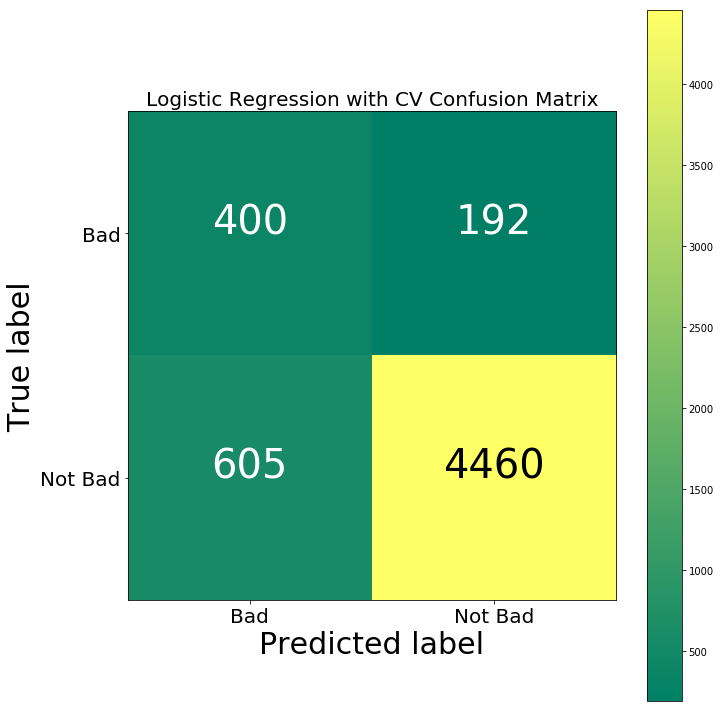

[[ 400  192]
 [ 605 4460]]


In [159]:
cm = confusion_matrix(y_test, y_pred_lr_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Logistic Regression with CV Confusion Matrix')
plt.show()
print(cm)

# Train Set Accuracy Score

In [160]:
print('Accuracy :', metrics.accuracy_score(y_train, logreg_CV.predict(count_vect_train)))

Accuracy : 0.9162100053031642


# Train Set Classification Report

In [161]:
print (classification_report(y_train, logreg_CV.predict(count_vect_train)))

             precision    recall  f1-score   support

        bad       0.56      0.97      0.71      1778
    not bad       1.00      0.91      0.95     15193

avg / total       0.95      0.92      0.93     16971



# Random Forest with CountVectorizing

In [162]:
rf_CV = RandomForestClassifier(random_state=5)
rf_CV.fit(count_vect_train, y_train)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.8941134877143362


In [163]:
print (classification_report(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

        bad       0.49      0.23      0.31       592
    not bad       0.92      0.97      0.94      5065

avg / total       0.87      0.89      0.88      5657



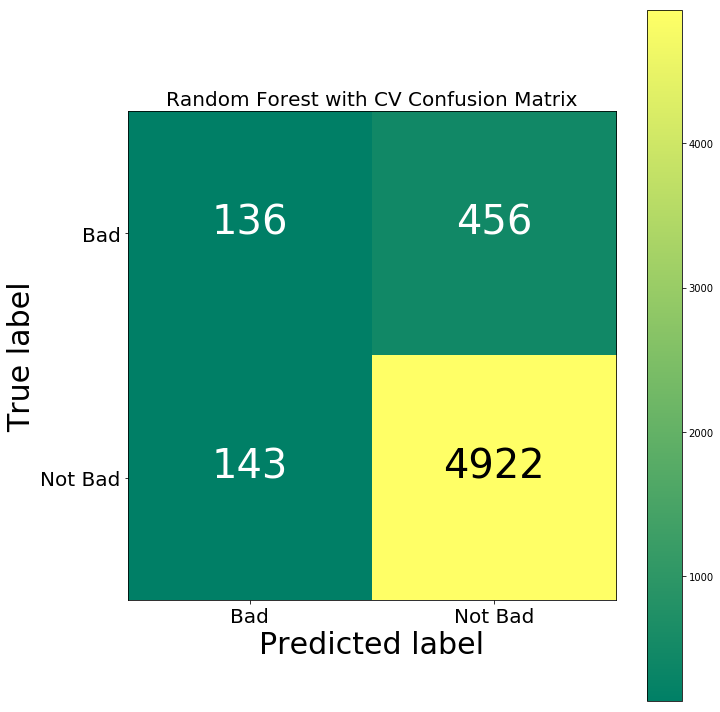

[[ 136  456]
 [ 143 4922]]


In [164]:
cm = confusion_matrix(y_test, y_pred_rf_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Random Forest with CV Confusion Matrix')
plt.show()
print(cm)

# LinearSVM with CountVectorizing

In [165]:
ln_SVM_CV = LinearSVC(random_state=5)
ln_SVM_CV.fit(count_vect_train, y_train)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

Accuracy : 0.8985327912321018


In [166]:
print (classification_report(y_test, y_pred_SVM_CV))

             precision    recall  f1-score   support

        bad       0.52      0.46      0.49       592
    not bad       0.94      0.95      0.94      5065

avg / total       0.89      0.90      0.90      5657



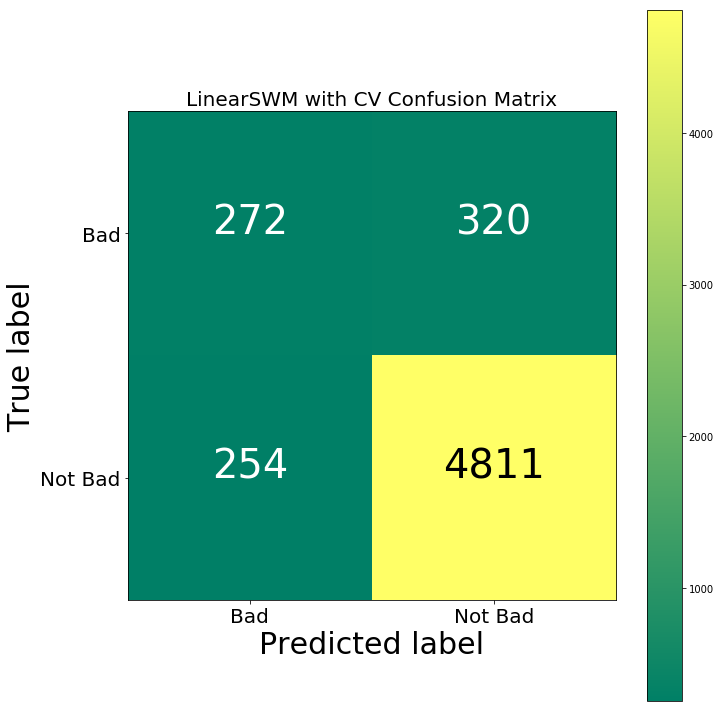

[[ 272  320]
 [ 254 4811]]


In [167]:
cm = confusion_matrix(y_test, y_pred_SVM_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='LinearSWM with CV Confusion Matrix')
plt.show()
print(cm)

# Gradient Boosting with CountVectorizing

In [168]:
gb_boost_cv = GradientBoostingClassifier()
gb_boost_cv.fit(count_vect_train, y_train)
y_pred_gb_boost = gb_boost_cv.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_gb_boost))

Accuracy : 0.9043662718755524


In [169]:
print (classification_report(y_test, y_pred_gb_boost))

             precision    recall  f1-score   support

        bad       0.70      0.15      0.25       592
    not bad       0.91      0.99      0.95      5065

avg / total       0.89      0.90      0.88      5657



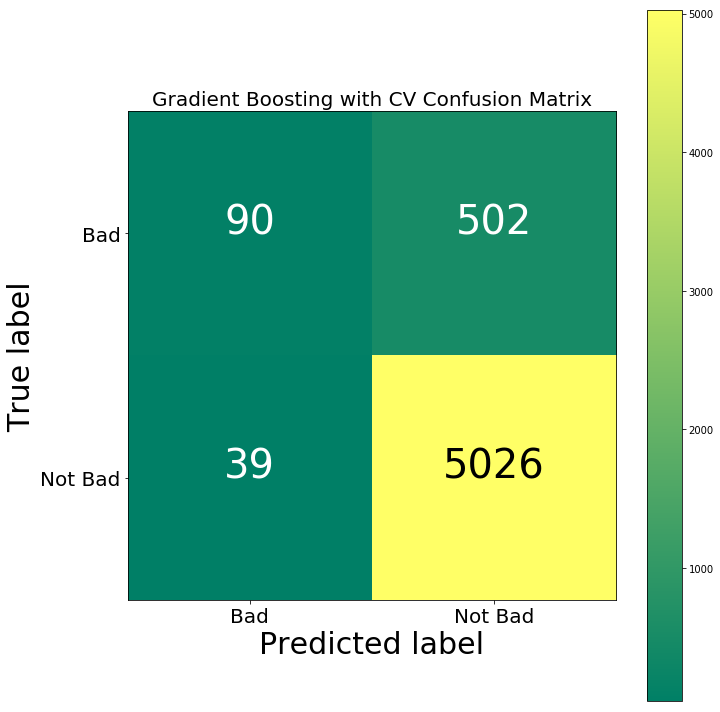

[[  90  502]
 [  39 5026]]


In [170]:
cm = confusion_matrix(y_test, y_pred_gb_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Gradient Boosting with CV Confusion Matrix')
plt.show()
print(cm)

# XG Boosting with CountVectorizing

In [171]:
xg_boost_CV = XGBClassifier()
xg_boost_CV.fit(count_vect_train, y_train)
y_pred_xg_boost = xg_boost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xg_boost))

Accuracy : 0.902245006187025


In [172]:
print (classification_report(y_test, y_pred_xg_boost))

             precision    recall  f1-score   support

        bad       0.71      0.11      0.19       592
    not bad       0.91      0.99      0.95      5065

avg / total       0.88      0.90      0.87      5657



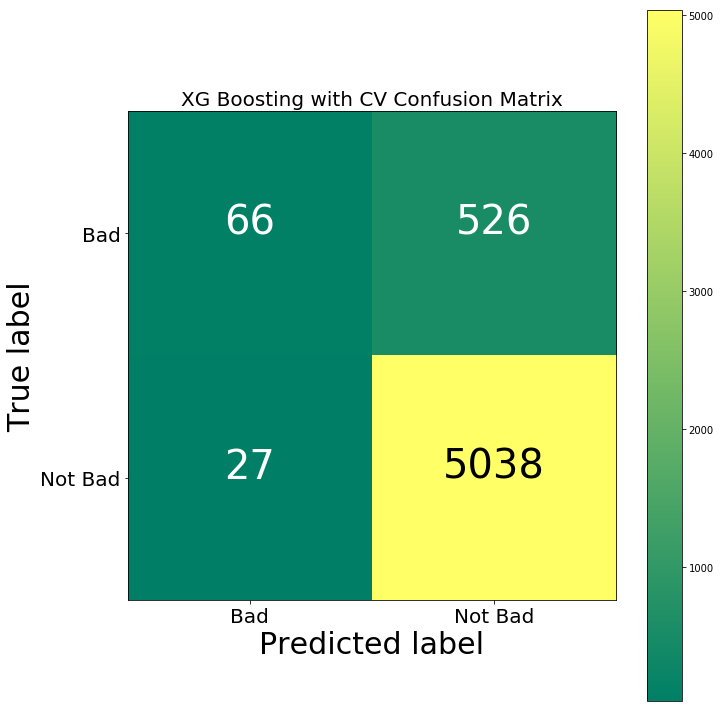

[[  66  526]
 [  27 5038]]


In [173]:
cm = confusion_matrix(y_test, y_pred_xg_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='XG Boosting with CV Confusion Matrix')
plt.show()
print(cm)

# Naive Bayes with CountVectorizing

In [174]:
MulNB_cv = MultinomialNB()
MulNB_cv.fit(count_vect_train, y_train)

y_pred_nb_cv = MulNB_cv.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_nb_cv))

Accuracy : 0.8914619056036769


In [175]:
print (classification_report(y_test, y_pred_nb_cv))

             precision    recall  f1-score   support

        bad       0.49      0.68      0.57       592
    not bad       0.96      0.92      0.94      5065

avg / total       0.91      0.89      0.90      5657



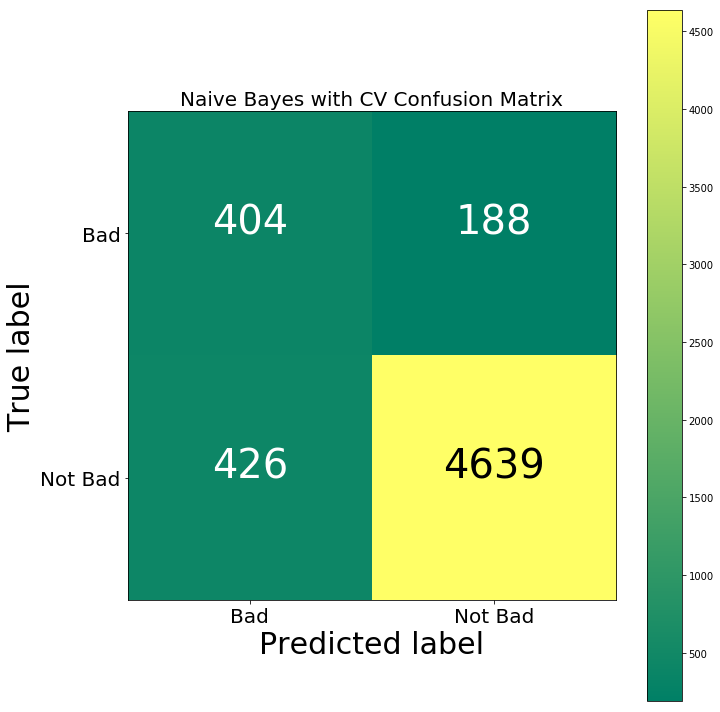

[[ 404  188]
 [ 426 4639]]


In [176]:
cm = confusion_matrix(y_test, y_pred_nb_cv)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Naive Bayes with CV Confusion Matrix')
plt.show()
print(cm)

# SMOTE

In [177]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=5)
df_text, df_target = sm.fit_sample(count_vect_train, y_train)
#print (count_vect_train.value_counts(), np.bincount(df_target))
print (df_text.shape)
print (df_target.shape)

(30386, 1922)
(30386,)


# Logistic Regression

In [178]:
logreg_CV = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              n_jobs=-1, random_state=5)
logreg_CV.fit(df_text, df_target)
y_pred_lr_CV = logreg_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

Accuracy : 0.8488598196924165


In [179]:
print (classification_report(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

        bad       0.37      0.67      0.48       592
    not bad       0.96      0.87      0.91      5065

avg / total       0.90      0.85      0.87      5657



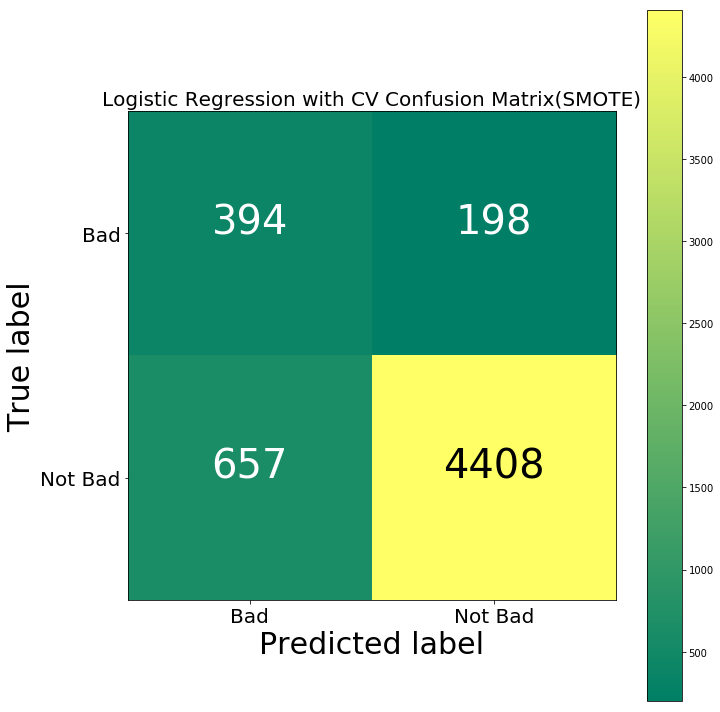

[[ 394  198]
 [ 657 4408]]


In [180]:
cm = confusion_matrix(y_test, y_pred_lr_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Logistic Regression with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Logistic Regression Train Set Accuracy

In [181]:
print('Accuracy :', metrics.accuracy_score(df_target, logreg_CV.predict(df_text)))

Accuracy : 0.9386888698742842


In [184]:
print (classification_report(df_target, logreg_CV.predict(df_text)))

             precision    recall  f1-score   support

        bad       0.91      0.97      0.94     15193
    not bad       0.97      0.90      0.94     15193

avg / total       0.94      0.94      0.94     30386



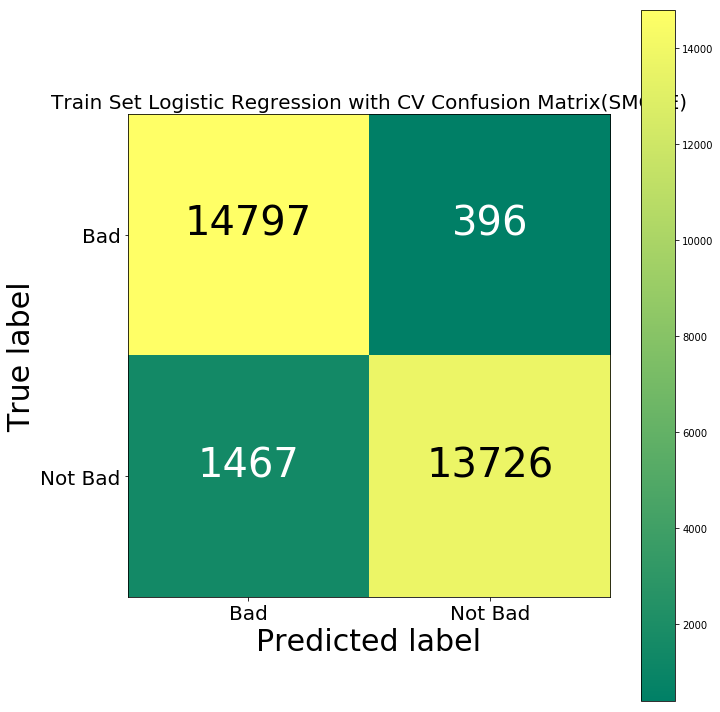

[[14797   396]
 [ 1467 13726]]


In [185]:
cm = confusion_matrix(df_target, logreg_CV.predict(df_text))
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Train Set Logistic Regression with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Random Forest with CountVectorizing

In [186]:
rf_CV = RandomForestClassifier(random_state=5)
rf_CV.fit(df_text, df_target)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.8918154498850981


In [187]:
print (classification_report(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

        bad       0.47      0.23      0.30       592
    not bad       0.91      0.97      0.94      5065

avg / total       0.87      0.89      0.87      5657



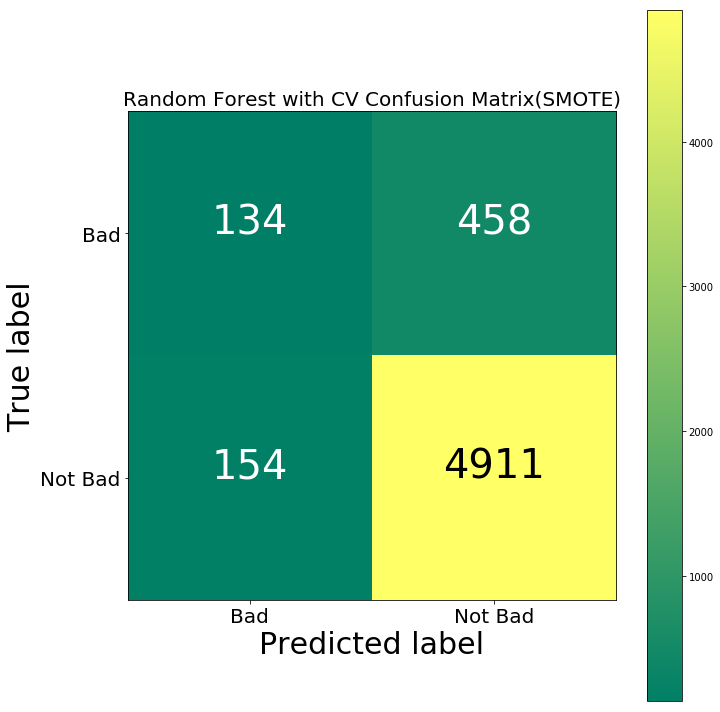

[[ 134  458]
 [ 154 4911]]


In [188]:
cm = confusion_matrix(y_test, y_pred_rf_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Random Forest with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# LinearSVM with CountVectorizing

In [189]:
ln_SVM_CV = LinearSVC(random_state=5)
ln_SVM_CV.fit(df_text, df_target)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

Accuracy : 0.843910199752519


In [190]:
print (classification_report(y_test, y_pred_SVM_CV))

             precision    recall  f1-score   support

        bad       0.36      0.62      0.46       592
    not bad       0.95      0.87      0.91      5065

avg / total       0.89      0.84      0.86      5657



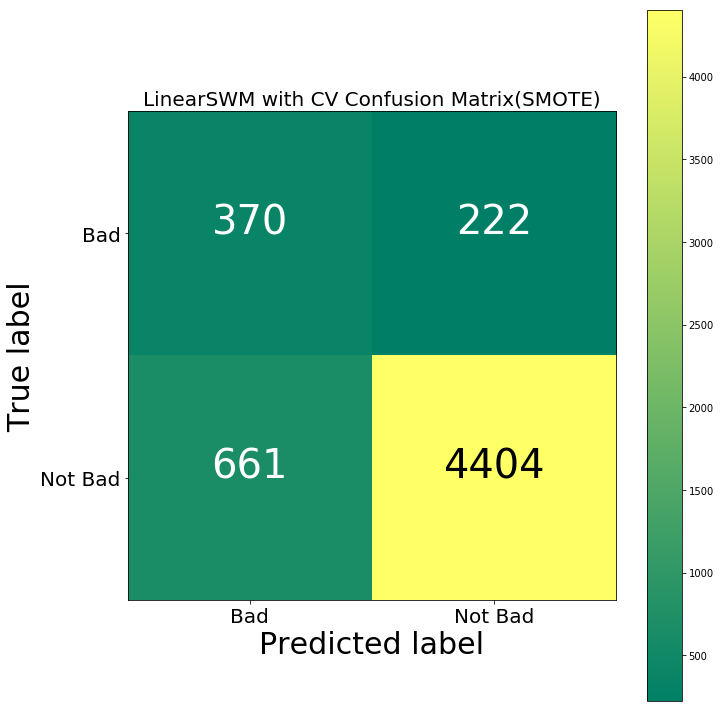

[[ 370  222]
 [ 661 4404]]


In [191]:
cm = confusion_matrix(y_test, y_pred_SVM_CV)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='LinearSWM with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Gradient Boosting with CountVectorizing

In [192]:
gb_boost_cv = GradientBoostingClassifier()
gb_boost_cv.fit(df_text, df_target)
y_pred_gb_boost = gb_boost_cv.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_gb_boost))

Accuracy : 0.8957044369807319


In [193]:
print (classification_report(y_test, y_pred_gb_boost))

             precision    recall  f1-score   support

        bad       0.50      0.33      0.40       592
    not bad       0.92      0.96      0.94      5065

avg / total       0.88      0.90      0.89      5657



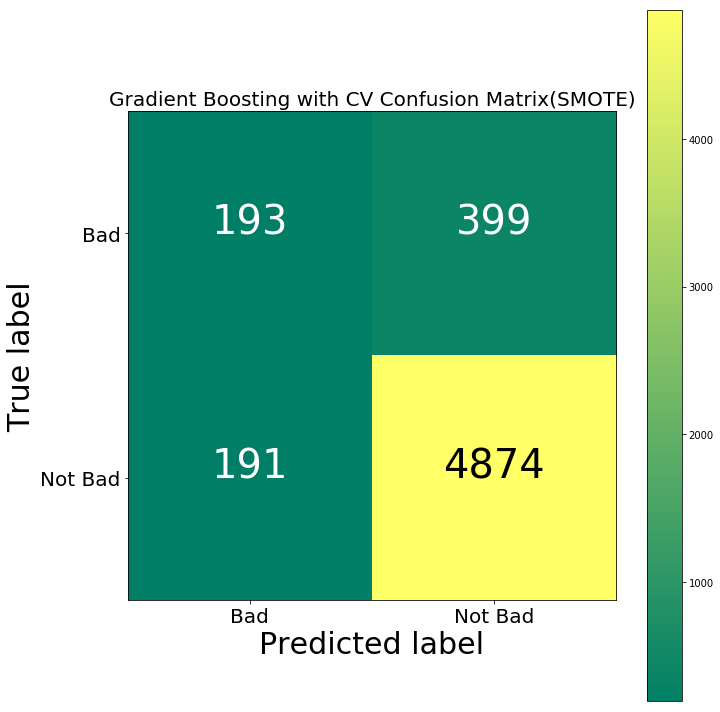

[[ 193  399]
 [ 191 4874]]


In [194]:
cm = confusion_matrix(y_test, y_pred_gb_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Gradient Boosting with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# XG Boosting with CountVectorizing

In [195]:
xg_boost_CV = XGBClassifier()
xg_boost_CV.fit(df_text, df_target)
y_pred_xg_boost = xg_boost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xg_boost))

Accuracy : 0.8964115255435743


In [196]:
print (classification_report(y_test, y_pred_xg_boost))

             precision    recall  f1-score   support

        bad       0.51      0.34      0.40       592
    not bad       0.93      0.96      0.94      5065

avg / total       0.88      0.90      0.89      5657



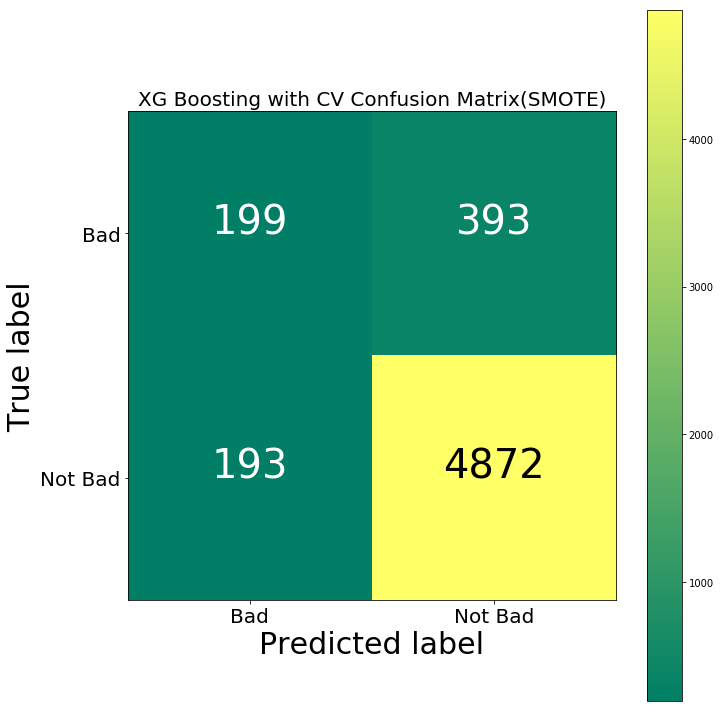

[[ 199  393]
 [ 193 4872]]


In [197]:
cm = confusion_matrix(y_test, y_pred_xg_boost)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='XG Boosting with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)

# Naive Bayes with CountVectorizing

In [198]:
MulNB_cv = MultinomialNB()
MulNB_cv.fit(df_text, df_target)
y_pred_nb_cv = MulNB_cv.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_nb_cv))

Accuracy : 0.8449708325967827


In [199]:
print (classification_report(y_test, y_pred_nb_cv))

             precision    recall  f1-score   support

        bad       0.39      0.81      0.52       592
    not bad       0.97      0.85      0.91      5065

avg / total       0.91      0.84      0.87      5657



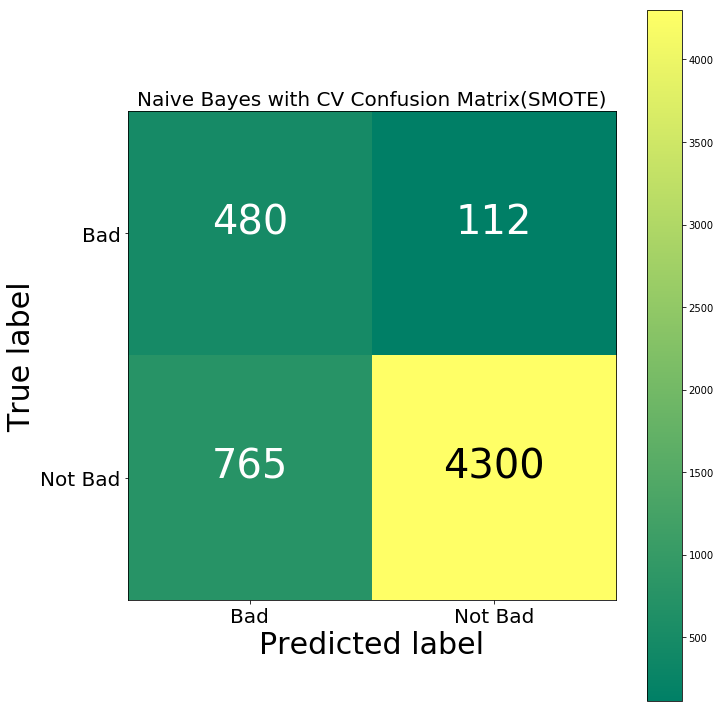

[[ 480  112]
 [ 765 4300]]


In [200]:
cm = confusion_matrix(y_test, y_pred_nb_cv)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Bad','Not Bad'], normalize=False, title='Naive Bayes with CV Confusion Matrix(SMOTE)')
plt.show()
print(cm)